<a href="https://colab.research.google.com/github/AnaGutson/AlgebraII/blob/main/Guia_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Guía 5**

In [ ]:
from sympy import *
from sympy import I as i
init_printing(use_unicode=True)
from typing import List, Dict
import numpy as np
from numpy import linspace
import matplotlib.pyplot as plt
from math import e as e

## **General**

###**Ángulos**

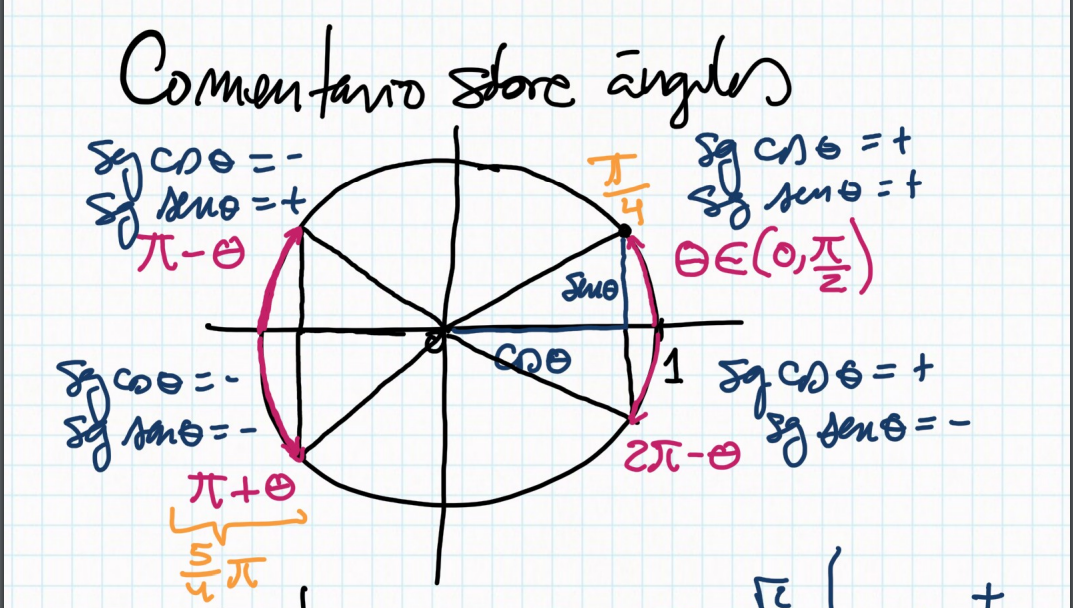

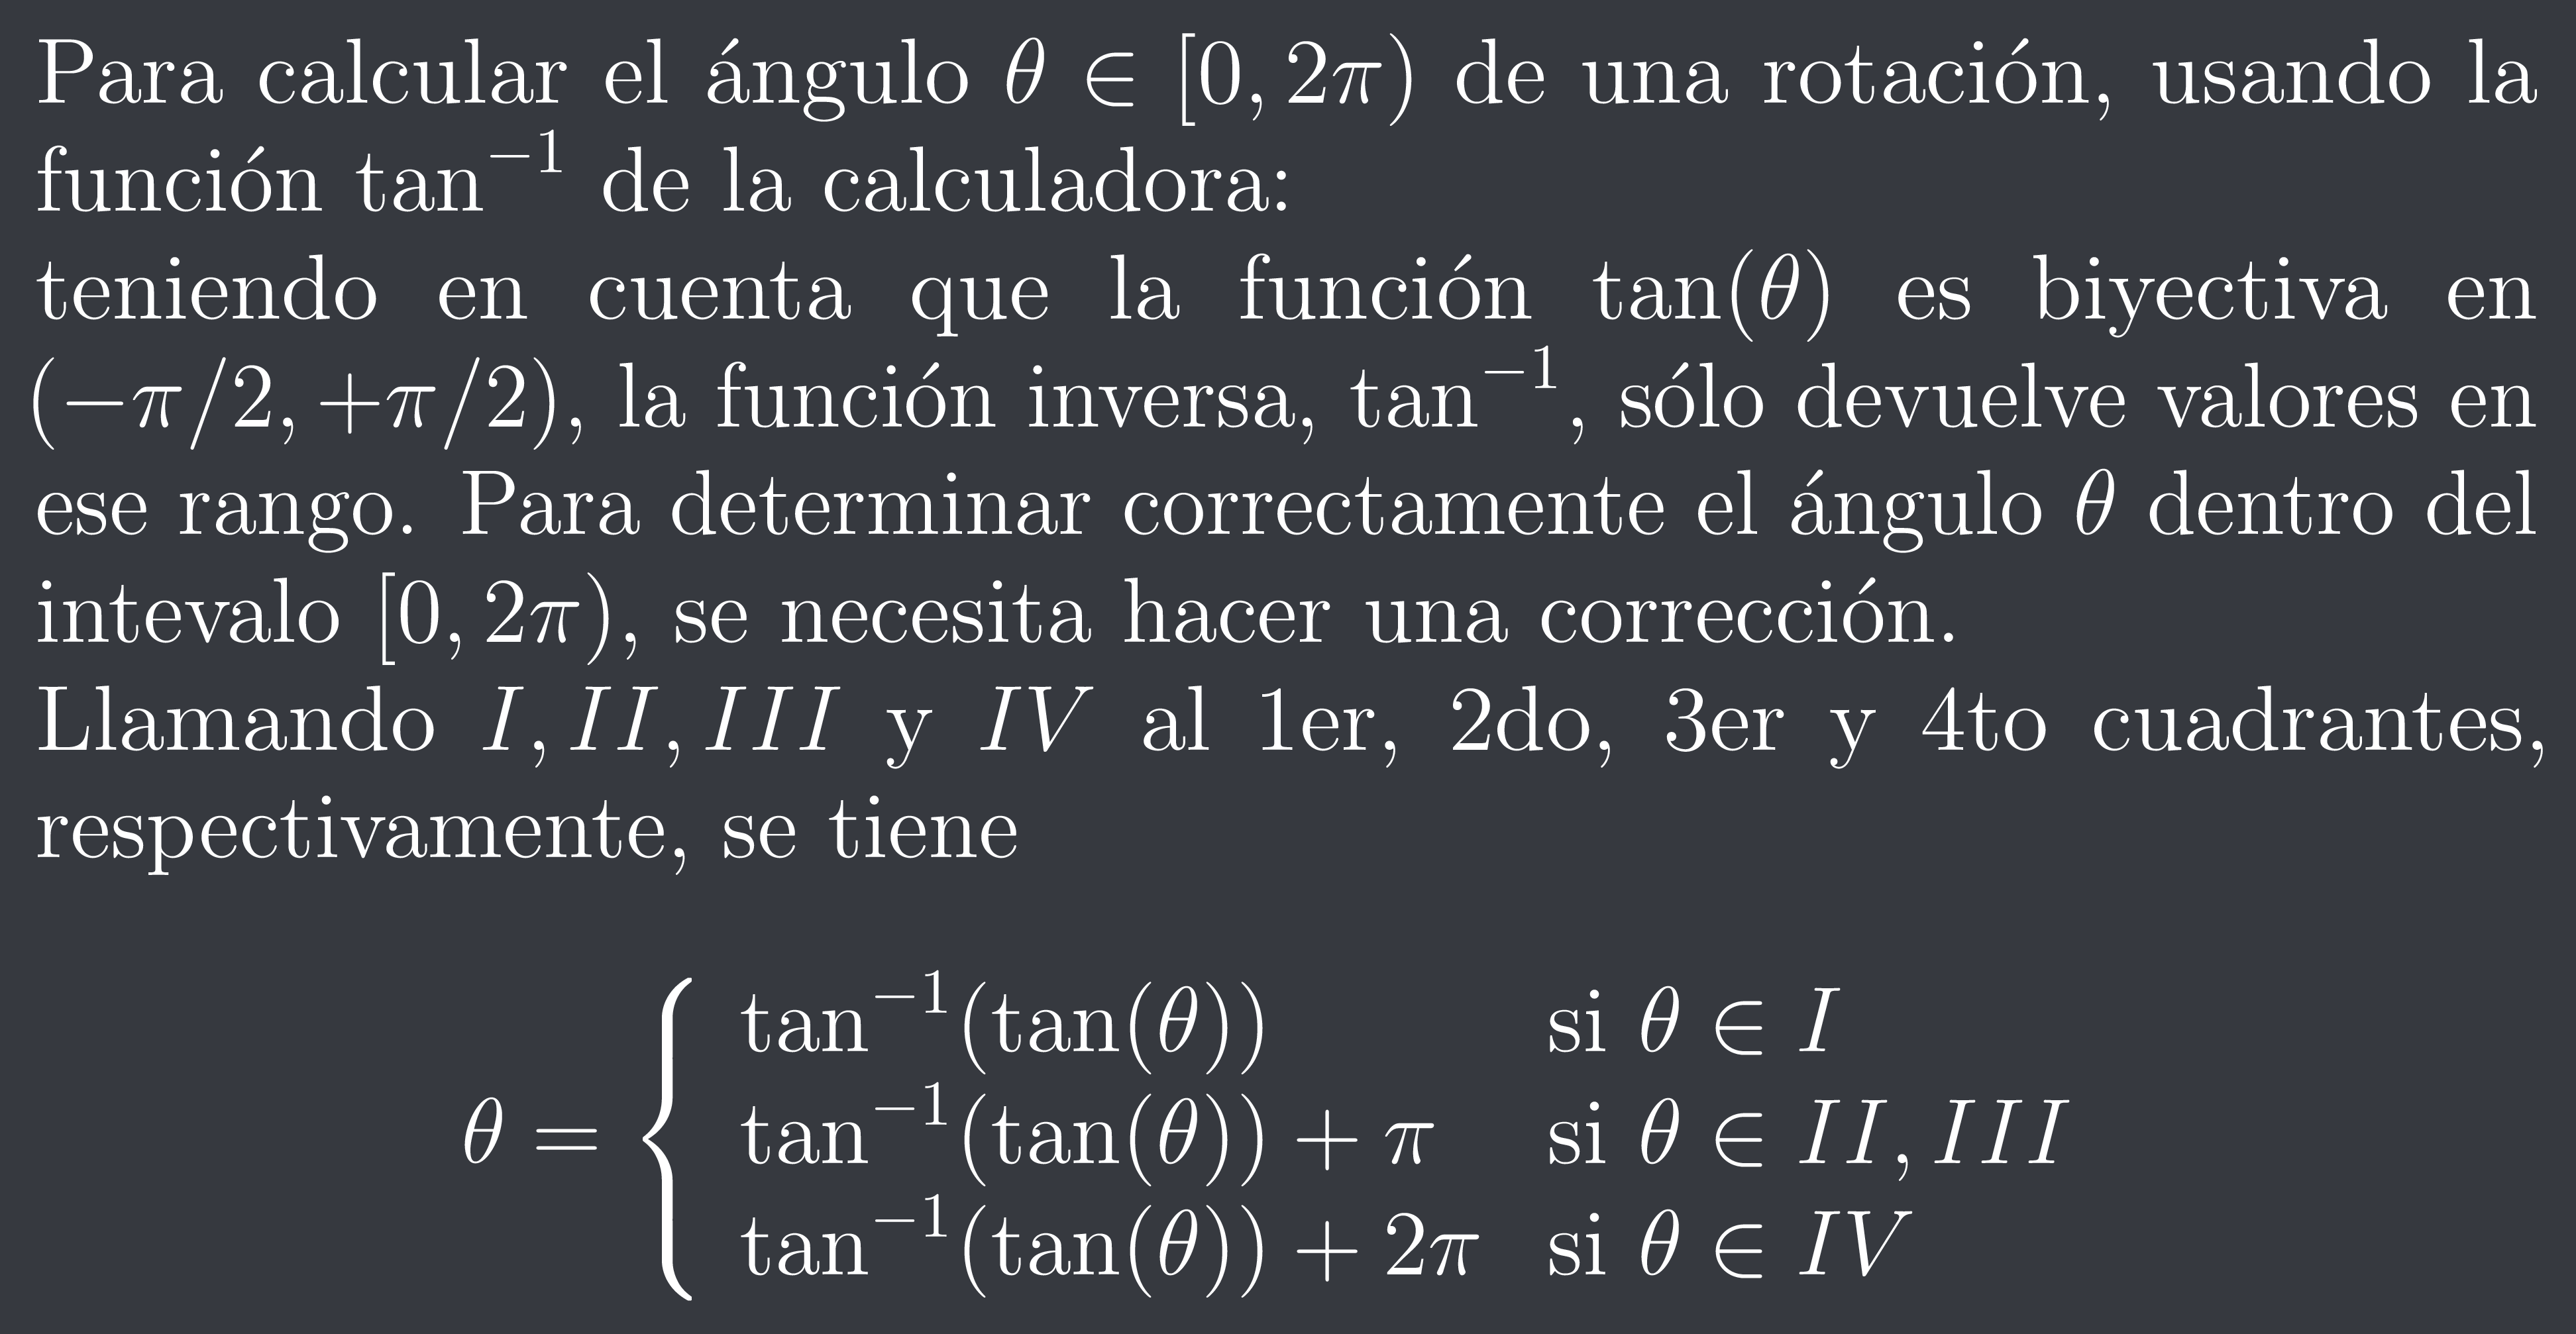

###**Triángulo de Pascal**

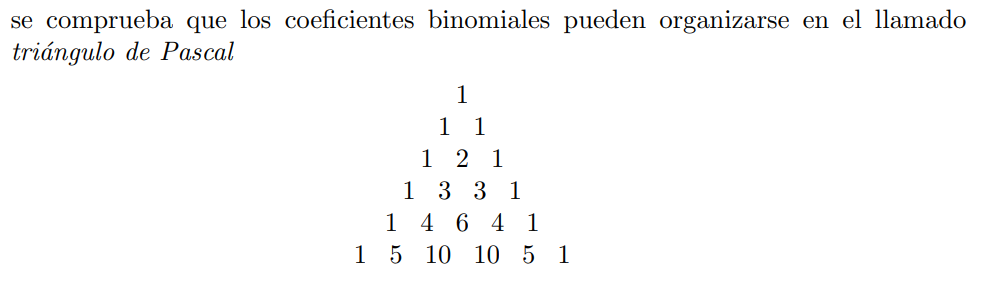

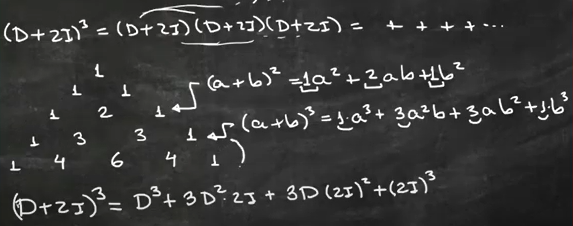

### **Producto Vectorial**

In [ ]:
def producto_vectorial(A,B):
  a = Matrix([[A[1], A[2]], [B[1], B[2]]]).det()
  b = Matrix([[A[0], A[2]], [B[0], B[2]]]).det()
  c = Matrix([[A[0], A[1]], [B[0], B[1]]]).det()
  return Matrix([a, -b, c])

###**Traza**

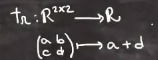

### **Matrices**

**Conseguir inversa de una matriz**

* Se invierten los valores de la diagonal, se niegan los valores de la contra diagonal, se divide todo por el determinante.

In [ ]:
'''
  A.inv                                   -> La inversa de A
  A.T                                     -> La transpuesta de A
  A.transpose()                           -> La transpuesta de A
  A.det                                   -> Determinante de A
  A.trace()                               -> Traza de A
  A.normalized()                          -> Matriz normalizada
  A.rref()                                -> Matriz triangulada
  A[1,0]                                  -> Posicion segunda fila primera columna
  A[:,0]                                  -> La primera columna de A
  A[0,:]                                  -> La primera fila de A
  A.col(0)                                -> La primera columna de A
  A.subs(t, pi/3)                         -> Reemplaza las t por pi/3
  A.subs({x1:1, x2:5, x3:7})              -> Reemplaza x1 por 1, x2 por 5...
  Z = zeros(2,1)                          -> Matriz de 0s de 2 filas 1 columna
  unos = ones(2,1)                        -> Matriz de 1s de 2 filas 1 columna
  eye(n)                                  -> Matriz identidad en n x n
  Matrix.hstack(v1,v2)                    -> Matriz con columnas v1, v2
  Matrix.vstack(v1,v2)                    -> Matriz con filas v1, v2
  Lambda = diag(2, 2, 3)                  -> Matriz diagonal
  x, parametro = B.gauss_jordan_solve(v)  -> Solucion de B.x = v
  simplify(A)                             -> Simplifica A
  expand(A)                               -> Expande A
  n, m = A.shape                          -> Cantidad filas y columnas de A
'''


#Escritura de matriz, ejemplos:

U = Rational('1/3') * Matrix([[ 2, 2, 1],
                              [-2, 1, 2],
                              [ 1,-2, 2]])

#___________________________________________

t = Symbol('t')
A = Matrix([[ cos(t), -sin(t)],
            [ sin(t), cos(t)]])
A.subs(t, pi/3)


def matriz_con_elementos_potenciados(A, pot):
  m, n = A.shape
  M = Matrix()
  for i in range(m):
    M_a_agregar = Matrix([A[i,0]**pot]) 
    M = M.vstack(M, M_a_agregar)
  return M

def rango(A):
  return len(A.columnspace())


### **Polinomios**

In [ ]:
'''
  diff(p,x) -> La derivada de p respecto de x
  p.subs(x,1) -> p(1)
  p.factor() -> factoriza un polinomio
  p.roots() -> las raices del polinomio
  solve(p) -> las raices del polinomio
  P = plot(p,(x,0,2)) -> grafico del polinomio con x entre 0 y 2
  P = plot(*L, (x,0,2)) -> grafico de una lista de polinomios con x entre 0 y 2
  P[0].line_color = 'red' -> color del primer polimonio
  P.show() -> muestra el grafico del polinomio con x entre 0 y 10
'''

#Escritura de polimomio, ejemplos:

x, a0, a1, a2 = symbols('x, a0, a1, a2')
p = a0 + a1*x + a2*x**2

### **Combinación Lineal**

In [ ]:
def gauss_jordan_con_generadores(A: Matrix, z: Matrix): #devuelve la solucion de gauss jordan entera, la sol part y sus generadores
  x, p = A.gauss_jordan_solve(z) 
  
  #hallo sol particular
  x_0 = x
  for i in range(len(p)):  
    x_0 = x_0.subs({p[i]:0}) 
  
  #hallo generadores
  generadores = []
  for i in range(len(p)):
    x_i = x - x_0
    for j in range(len(p)):
      if j != i:
        x_i = x_i.subs({p[j]:0})
    x_i = x_i.subs({p[i]:1})
    generadores.append(x_i)
    
  return x, x_0, generadores

### **Independencia Lineal**

In [ ]:
def encontrar_vector_li_a_conjunto(A: List[Matrix]):  #Principio de sustitución de Steinez
  cant_filas, _ = A[0].shape
  A_ld = Matrix.hstack(*A, eye(cant_filas,cant_filas))
  A_li = obtener_vectores_li(A_ld)
  return A_li

#_______________________

def obtener_vectores_li(A: Matrix):
  E_A, pivotes_A = A.rref()
  A_li = []
  for pivote in pivotes_A:
      A_li.append(A.col(pivote))        #De la matriz original
  return A_li

#_______________________

'''
  Ejemplo:
  B = [Matrix([a, 1, 2]), Matrix([3, 2, 3]), Matrix([1, -a, 1])] #una lista
  encontrar_a(B, a)
'''
a = Symbol('a')
def encontrar_a(B: List[Matrix], a: Symbol): #Halla el o los valores que puede tener a para que los vectores sean linealmente independientes: formen una base

    return solve(det(Matrix.hstack(*B)), a)

### **Ínfimo y Supremo**

In [ ]:
'''
cant_neg: cantidad de vectores que pertenecen al segundo subespacio
'''
def interseccion_S1_S2_dos_lados(S1: List[Matrix], S2: List[Matrix]):
  S2_neg = [i*(-1) for i in S2]
  B_S1_S2 = Matrix.hstack(*S1,*S2_neg)
  cant_S2 = len(S2)
  nul_B_S1_S2 = B_S1_S2.nullspace()
  S1_int_S2 = []
  for v in nul_B_S1_S2:
      v[(-1)*cant_S2:,:] = zeros(cant_S2, 1)
      S1_int_S2.append(B_S1_S2 * v)

  return S1_int_S2

def union_S1_S2(S1: List[Matrix], S2: List[Matrix]):
    B_S1_S2 = Matrix.hstack(*S1,*S2)
    S1_un_S2 = obtener_vectores_li(B_S1_S2)
    return S1_un_S2                

###**Transformaciones Lineales**

In [ ]:
#Parametros: T una t.l, B una base    
#Devuelve la matriz de la transformacion lineal T a partir de T y una base
def matriz_tl_con_tl_y_base(T: Matrix, B: List[Matrix]): #la matriz de T a partir de B
  TB = Matrix() 
  for i in B:
    ti = T*i
    TB = Matrix.hstack(TB, ti)
  return TB


#Parametros: B una base, W  los transformados de B    
#Devuelve la matriz de la transformacion lineal T a partir de una base, y los transformados de la base    
def matriz_tl_con_base_y_transformados(B: List[Matrix], W: List[Matrix]): #la matriz de T a partir de los transformados de B
    return Matrix.hstack(*W) * Matrix.hstack(*B).inv()

#Parametros: T una t.l, p una lista de polinomios
#Devuelve T(polinomios)
def transformacion_lineal_pol(T: Matrix, polinomios):
  polinomios = [Matrix([i]) for i in polinomios]
  P = Matrix.vstack(*polinomios)
  return (expand(T*P))[0,0] #devuelvo el elemento que está en formato Matriz

### **Monomorfismo, epimorfismo e isomorfismo**

In [ ]:
def clasificacion(At: Matrix):
  imT = At.columnspace()
  nuT = At.nullspace()

  dimW, dimV = At.shape
  if len(nuT) == 0 and len(imT) == dimW:
    return 'T es un isomorfismo'
  else:
    if len(nuT) == 0:
      return 'T es un monomorfismo'
    elif len(imT) == dimW:
      return 'T es un epimorfismo'
  
  return 'T no es un monomorfismo ni un epimorfismo'

### **Imagen y Preimagen**

In [ ]:
'''
    Halla la imagen por T de un subespacio S dada una base B y la imagen por T de B
    
    B: es una lista de vectores que conforman la base B
    W: es una lista de vectores que corresponden a las imágenes de los vectores de la base B
    S: es una lista de vectores que generan el subespacio S
'''
def imagen_por_T_de_S_con_B_y_W(B: List[Matrix], W: List[Matrix], S: List[Matrix]): 
    # Obtengo la matriz de T
    A_T = matriz_tl_con_base_y_transformados(B, W)

    # Obtengo los transformados de S    
    imagen_T_S = A_T * Matrix.hstack(*S)

    # Armo una base con los transformados de S    
    base_T_S = obtener_vectores_li(imagen_T_S)
    
    return base_T_S

#_______________________________________________________________________________


#Forma 1, explicada arriba
def preimagen_subespacio_con_At(At: Matrix, Au: Matrix):
  
    return (Au*At).nullspace()
    
#_______________________________________________________________________________

#Forma 2, explicada arriba
def preimagen_subespacio_con_B_y_W(B: List[Matrix], W: List[Matrix], Au: Matrix):
    B_matrix = Matrix.hstack(*B)
    W_matrix = Matrix.hstack(*W)

    sol = (Au * W_matrix).nullspace()
    preimagen_U = B_matrix * Matrix.hstack(*sol)

    #Obtengo una base de la preimagen
    B_T_inv_U = obtener_vectores_li(preimagen_U)
    
    return B_T_inv_U    


### **Coordenadas**

In [ ]:
def coordenadas_v_en_B(v: Matrix, B):
  M_B = Matrix.hstack(*B) 
  
  #v = M_B * [v]^B
  vB, pivotes = M_B.gauss_jordan_solve(v)
  
  return vB

def imagen_de_T_con_At_B_Bprima(At_B_Bprima: Matrix, Bprima: List[Matrix]):
  
  #Obtengo Col(At) = gen{[T(v)]^B' ... }
  imagenBprima = At_B_Bprima.columnspace()

  #Quiero Im(T) = gen{T(v) ... }
  #Es decir, necesito escribir los [T(v)]^B' como T(v)
  #T(v) = M_Bprima * [T(v)]^B'
  imagen = Matrix.hstack(*Bprima) * Matrix.hstack(*imagenBprima)
  
  base_imagen = obtener_vectores_li(imagen)
  
  return base_imagen

def nucleo_de_T_con_At_B_Bprima(At_B_Bprima: Matrix, B: List[Matrix]):
  
  #Obtengo Nul(At) = gen{[x]^B ... }
  nucleoB = At_B_Bprima.nullspace()

  #Quiero Nu(T) = gen{x ... }
  #Es decir, necesito escribir los [x]^B como x
  #x = M_B * [x]^B
  nucleo = Matrix.hstack(*B) * Matrix.hstack(*nucleoB)
  
  base_nucleo = obtener_vectores_li(nucleo)
  
  return base_nucleo

def nucleo_de_T_con_At_B_Bprima_pol(At_B_Bprima: Matrix, B: List[Matrix]):
  
  #Obtengo Nul(At) = gen{[x]^B ... }
  nucleoT = T1oT2inv_Eprima_E.nullspace()
  
  #Quiero Nu(T) = gen{x ... }
  #Es decir, necesito escribir los [x]^B como x
  #x = M_B * [x]^B

  nucleo = Ep * Matrix.hstack(*nucleoT)
  
  return nucleo 

### Graficar

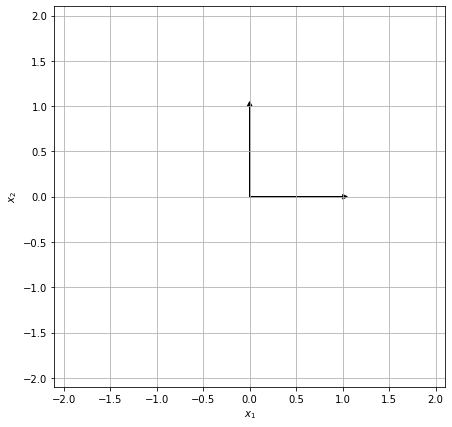

In [ ]:
def plot_vector2d(*vectors,xlim=(0,1),ylim=(0,1)):
  fig, ax = plt.subplots(1,1,figsize=(7,7))

  for v in vectors:
    x, y = float(v[0]), float(v[1])
    ax.arrow(0,0,x,y,head_width=0.05, head_length=0.05, fc='k', ec='k')
  
  ax.set_xlim(*xlim)
  ax.set_ylim(*ylim)
  ax.grid(True)
  ax.set_xlabel('$x_1$')
  ax.set_ylabel('$x_2$')
  fig.show()
  return fig, ax

def plot_recta_simetria(theta,ax):
  x1, x2 = ax.get_xlim()

  if theta not in [pi/2,-pi/2]:
    y1 = float(tan(theta/2*x1))
    y2 = float(tan(theta/2*x2))
  else:
    y1, y2 = ax.get_ylim()
  
  ax.arrow(x1,y1,x2-x1,y2-y1,fc='b',ec='b')
  return ax

def graficar_dos_funciones(f1,f2):
  p1 = plot(f1,xlim=(-1,1),ylim=(-2,2),show=False,line_color='blue')
  p2 = plot(f2,xlim=(-1,1),ylim=(-2,2),show=False,line_color='red')
  p1.append(p2[0])
  p1.show()

v1, v2 = Matrix([1,0]), Matrix([0,1])
fig, ax = plot_vector2d(v1,v2,xlim=(-2.1,2.1),ylim=(-2.1,2.1))

### **Proyecciones y Simetrías**

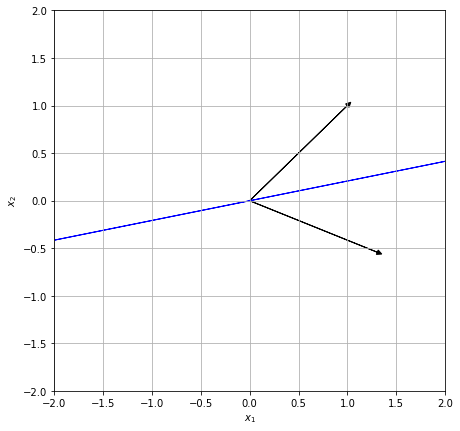

In [ ]:
def simetria(v,theta):
  S = Matrix([[cos(theta), sin(theta)],
              [sin(theta), -cos(theta)]])
  w = S * v
  return w

v = Matrix([1,1])
theta = pi/8

v_s = simetria(v,theta)
fig, ax = plot_vector2d(v,v_s,xlim=(-2,2),ylim=(-2,2))
ax = plot_recta_simetria(theta,ax)

#__________________________

def tipo_tl(T: Matrix):
  T2 = T*T
  n,m = T2.shape
  if T2 == T:
    return 'Es una proyección'
  elif T2 == eye(n,n):
    return 'Es una simetría'
  return 'No es proyección ni simetría'
  


### **Rotaciones**

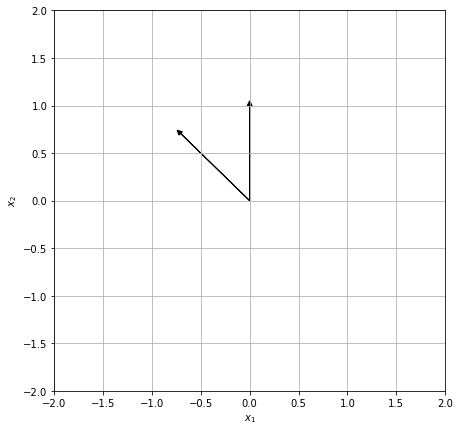

In [ ]:
def rotacion(v,theta):
  R = Matrix([[cos(theta), -sin(theta)],
              [sin(theta), cos(theta)]])
  w = R * v
  return w

#Ejemplo
v = Matrix([0,1])
theta = pi/4

v_r = rotacion(v,theta)
fig, ax = plot_vector2d(v,v_r,xlim=(-2,2),ylim=(-2,2))

### **Ecuaciones Diferenciales**

In [ ]:
def nucleo_de_operador_diferencial(L):
    x = Symbol('x')
    Nu_L = set()
    raices = str(L).split('*')
    l = 1
    for raiz in raices:

      if '-' in raiz:
        index = raiz.index('-') + 1
        l = (int(raiz[index]))*(-1)
      elif '+' in raiz:
        index = raiz.index('+') + 1
        l = (int(raiz[index]))
      else:
        display(raiz)
      
      if '^' in raiz:
        k = int(raiz.split('^')[1])
      else:
        k = 1
          
      for i in range(k):
        Nu_L.add((x**(i))*exp(-l*x))

    return Nu_L

def gen_solucion_particular(L, AoL):
    Nu_L = nucleo_de_operador_diferencial(L)
    Nu_AoL = nucleo_de_operador_diferencial(AoL)
    Nu = set()
    Nu = Nu_L | Nu_AoL
    Nu = Nu - Nu_L
    return list(Nu)

D, I = symbols('D I')
L = '(D-5I)*(D+2I)^2'
AoL = '(D-5I)*(D+2I)^5'
gen_solucion_particular(L, AoL)

###**Producto Interno**

In [ ]:
def producto_interno_canonico(x, y, G: Matrix = None):
    return (y.T * x)[0]

def producto_interno_por_definicion(x: Matrix, y: Matrix, G: Matrix):
    return (y.T * G * x)[0]
    
def producto_interno_polinomios_integral(p, q, G:Matrix = None, limite_inferior=-1, limite_superior=1, a=1):
    return integrate(p * q * a, (x, limite_inferior, limite_superior))

def norma(x, producto_interno, G: Matrix=None):
    return sqrt(producto_interno(x, x, G))

#A.norm() -> la norma con el producto interno canónico, es decir, producto escalar

###**Matriz de Gram**

In [ ]:
def matriz_gram(producto_interno, B):
    n = len(B) # Cantidad de componentes de la base

    # Inicializo la matriz de Gram
    G = zeros(n,n)
    
    # Lleno la matriz calculando los productos internos
    for i, p in enumerate(B):
        for j, q in enumerate(B):
            G[i,j] = producto_interno(p,q)
    return G 

def matriz_gram_con_G(producto_interno, B, GB):
    n = len(B) # Cantidad de componentes de la base

    # Inicializo la matriz de Gram
    G = zeros(n,n)
    
    # Lleno la matriz calculando los productos internos
    for i, p in enumerate(B):
        for j, q in enumerate(B):
            G[i,j] = producto_interno(p,q, GB)
    return G 

def area_de_un_paralelogramo(G: Matrix):
    return sqrt(G.det())

def area_de_un_triangulo(G: Matrix):
    return area_de_un_paralelogramo(G)/2

###**Proyección Ortogonal**

In [ ]:
def y_tilda(y, B: List, producto_interno, G: Matrix = None):
  return Matrix([producto_interno(y, B[i], G) for i in range(len(B))])

def proyeccion_ortogonal_de_v_a_S_un_generador(v, gen, producto_interno, G: Matrix = None):
  return producto_interno(v, gen, G) * gen / norma(gen, producto_interno, G)**2

def proyeccion_ortogonal_de_v_a_S_varios_generadores(y, B, producto_interno):
  G = matriz_gram(producto_interno, B)
  y_tilda = y_tilda(y, B, producto_interno)
  p_coord = G.T.inv() * y_tilda
  p_hat = (Matrix.hstack(*B) * p_coord)
  return p_hat
  
def proyeccion_ortogonal_de_v_a_S_varios_generadores_pol(y, B, producto_interno):
  G = matriz_gram(producto_interno, B)
  ytilda = y_tilda(y, B, producto_interno)
  p_coord = G.T.inv() * ytilda
  p_hat = (Matrix(B).T * p_coord)
  return p_hat

def proyeccion_ortogonal_de_v_a_S_ortogonal(v: Matrix, B: List[Matrix]):
  m, n = v.shape
  P_S_v = zeros(m, n)
  for i in range(len(B)):
    u = B[i]
    P_S_v = P_S_v + proyeccion_ortogonal_de_v_a_S_un_generador(v, u, producto_interno_canonico)  
  return P_S_v


### **Distancia**

In [ ]:
def distancia_entre_funciones(f1, f2, producto_interno, G: Matrix = None):
  f = f1 - f2
  d = norma(f, producto_interno)
  return d

###**Ángulo** 

In [ ]:
def angulo(x: Matrix, y: Matrix, producto_interno, G: Matrix=None):
    return acos(producto_interno(x, y, G) / (norma(x, producto_interno, G) * norma(y, producto_interno, G)))

### **Subespacios**

Recuerdo:
*   $rango(A)$ = $dim(col(A))$ = $dim(col(A^T))$.
*   $dim(nul(A))$ = $n$ − $rango(A)$ = $n$ − $dim(col(A)) \quad$ donde $\quad n$ = cantidad de columnas de $A$ 

*   $dim(nul(A^T))$ = $m$ − $dim(col(A^T)) \quad$ donde $\quad m$ = cantidad de filas de $A$ 

_________________

Vale que $nul(A) = col(A^T)^\perp$. Entonces: $$\mathbb R^n = nul(A) \oplus col(A^T).$$

También vale que $nul(A^T) = col(A)^\perp$. Entonces: $$\mathbb R^m = nul(A^T) \oplus col(A).$$


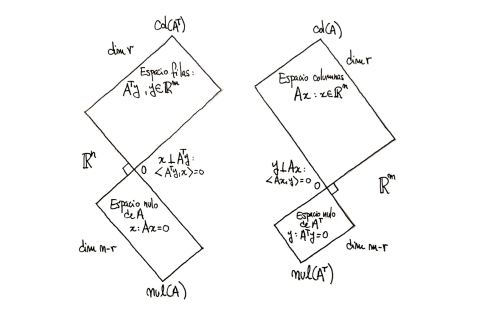

Recuerdo:

$Bx=v$ tiene solución si y solamente si $v ∈ col(B)$

*   $Bx=v$ tiene solución única $<=>$ las columnas de A forman un conjunto LI $<=>$ $Nul(A)$ = 0 
 
*   $Bx=v$ tiene $\infty$ soluciones $<=>$ las columnas de A forman un conjunto LD $<=>$ $Nul(A)$ $\neq$ 0 

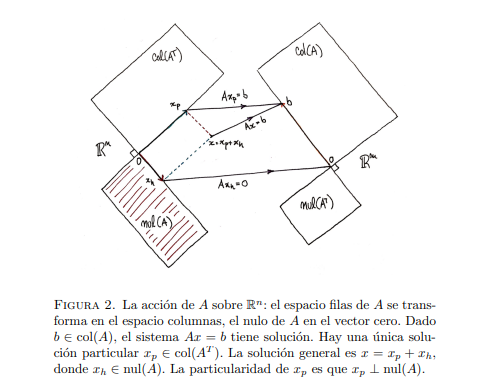

In [ ]:
'''  
  A.nullspace() -> devuelve el espacio nulo de A 
  A.columnspace() -> devuelve el espacio columna de A
  A.T.columnspace() -> devuelve el espacio columna de A traspuesta
  A.T.nullspace() -> devuelve el espacio nulo de A traspuesta
  n, m = A.shape -> cantidad de filas y columnas de la matriz
'''

'''
    S: lista de los vectores que generan al subespacio S
    Los pivotes empiezan en 0 (por ej: la segunda columna figuraría con el pivote 1)
'''
def algoritmo_espacio_columna(S: List[Matrix]): #Encuentra el espacio columna de un subespacio
    B_S = Matrix.hstack(*S)
    E_S, pivotes_S = B_S.rref()
    S_li = []
    for pivote in pivotes_S:
        S_li.append(S[pivote])        #De la matriz original
    return S_li, pivotes_S #devuelve la matriz con los vectores que generan el espacio columna y los índices de los pivotes.    

def algoritmo_espacio_filas(S: List[Matrix]): #Encuentra el espacio fila de un subespacio
    B_S = Matrix.hstack(*S).T
    E_S, pivotes_S = B_S.rref()
    S_li = []
    for pivote in pivotes_S:
        S_li.append((E_S[pivote,:]).T) #De la matriz escalonada
    return S_li, pivotes_S #devuelve la matriz con los vectores que generan el espacio fila y los índices de los pivotes.     

def dos_subespacios_generan_el_mismo_subespacio(S1: List[Matrix], S2: List[Matrix]):
    
    S1_li, pivotes_S1 = algoritmo_espacio_columna(S1)
    S2_li, pivotes_S2 = algoritmo_espacio_columna(S2)
    
    B_S1_li = Matrix.hstack(*S1_li)
    B_S2_li = Matrix.hstack(*S2_li)
    
    B = Matrix.hstack(B_S1_li, B_S2_li)
    _, pivotes_B = B.rref()
    
    return len(pivotes_B) == len(pivotes_S1) and len(pivotes_B) == len(pivotes_S2)


### **Mínimos cuadrados**

In [ ]:
#A.pinv() -> pseudoinversa 

def solucion_por_minimos_cuadrados(A, b):
  ATA = (A.T)*A
  ATb = (A.T)*b
  sol, sp, generadores = gauss_jordan_con_generadores(ATA, ATb)
  return sp, generadores

def error_cuadratico(b, A, x):
  return (b - A*x).norm()**2

def solucion_norma_minima(A, sp):
  filA = A.T.columnspace()
  MfilA = Matrix.hstack(*filA)
  sol, x_coord, gen = gauss_jordan_con_generadores(A*MfilA, A*sp)
  x_hat = Matrix.hstack(*filA)*x_coord #la solucion de Ax = b de norma mínima
  norma = x_hat.norm() #la norma
  return x_hat, norma

def solucion_por_minimos_cuadrados_rango_max(A, b):
  A_MP = A.pinv() #matriz pseudoinversa de Moore-Penrose
  x_hat = A_MP * b #solución por mínimos cuadrados de Ax=b
  return x_hat

### **Base Ortogonal**

In [ ]:
def normalizar_base(v1,v2,producto_interno, G: Matrix = None): #pi personalizado

  v1_hat = v1 / norma(v1,producto_interno, G)
  
  aux = v2 - producto_interno(v2,v1, G) / norma(v1,producto_interno, G)**2 * v1
  v2_hat = aux / norma(aux, producto_interno, G)

  return v1_hat, v2_hat

#GramSchmidt([v1, v2, v3, v4], orthonormal=True)

def proyeccion_ortogonal_de_v_a_S_ortogonal(v: Matrix, B: List[Matrix]):
  m, n = v.shape
  P_S_v = zeros(m, n)
  for i in range(len(B)):
    u = B[i]
    P_S_v = P_S_v + proyeccion_ortogonal_de_v_a_S_un_generador(v, u, producto_interno_canonico)  
  return P_S_v

def QR(A):
  B = A.columnspace()
  Q = GramSchmidt(B, orthonormal='True') #esta es Q
  MQ = Matrix.hstack(*Q)
  MR = MQ.gauss_jordan_solve(A)[0]
  return MQ, MR

### **Polinomio Característico**

In [ ]:
def chi(matriz): #Polinomio Caracteristico
  n, m = matriz.shape
  assert n == m, "La matriz tiene que ser cuadrada"
  I = eye(n)
  x = Symbol('x')
  chi_matriz = (matriz - x*I).det()
  return chi_matriz

### **Autovalores y Autovectores**

In [ ]:
#matriz.eigenvals() #autovalores y multiplicidades algebraicas
#matriz.eigenvects() #autovalores, multiplicidades algebraicas, autoespacios

def base_autovects(A): #Base autovectores: P
  autovects =  A.eigenvects()
  m = len(autovects)
  X = list()
  for i in range(m):
    X.append(Matrix.hstack(*autovects[i][2]))
  P = Matrix.hstack(*X)
  return P

def autovals_and_autospaces(A):
  n, m = A.shape
  assert n == m, "A tiene que ser cuadrada"

  identity_mat = eye(n) # Matriz identidad en n x n

  l = symbols('\lambda')
  polyA = (A - l * identity_mat).det()

  avas = roots(polyA,l)
  avas = list(avas.keys())

  aves = {ava: (A-ava*identity_mat).nullspace() for ava in avas}

  return avas, aves

###**Diagonalización**


In [ ]:
#P, Lambda = matriz.diagonalize() #P y Diagonal

### **Proyectores**

In [ ]:
def DS(matriz): #Autovalores y proyectores
  autovects =  matriz.eigenvects()
  m = len(autovects)
  X = list()
  for i in range(m):
    X.append(Matrix.hstack(*autovects[i][2]))
  P = Matrix.hstack(*X)
  IP = P.inv()
  k = 0
  mu = list()
  mu.append(0)
  for i in range(m): 
    k = k + autovects[i][1]
    mu.append(k)
  Y = list()
  for k in mu[0:m]:
    Y.append(IP[mu[k]:mu[k+1], :])
  G = list()
  for j in range(len(X)):
    G.append(simplify(autovects[j][0]))
    G.append(simplify(X[j]*Y[j]))
  return(G)

### **Limite**

In [ ]:
def limite(A):
  m = len(A.nullspace()) + len(A.columnspace())
  n = Symbol('n')
  A_n = A**n
  A_infty = zeros(m, m)
  for i in range(m):
      for j in range(m):
          A_infty[i,j] = simplify(limit_seq(A_n[i,j]))
  return(A_infty) 

#Esta función calcula el limite de la sucesión A^n 
#(casi seguro que para matrices diagonalizables)

###**Matrices no diagonalizables**

In [ ]:
#P, B = matriz.jordan_form()

## **Específico**

###**Matrices Ortogonales**

Decimos que $U \in \mathbb R^{n \times n}$ es una matriz ortogonal si $$U^TU = UU^T = I,$$ o lo que es lo mismo $U^T = U^{-1}$.

Sea $U \in \mathbb R^{n \times n}$. Las siguientes afirmaciones son equivalentes:
1. $U$ es ortogonal.
2. $U$ es inversible y $U^{-1} = U^T$.
3. $U^T$ es ortogonal.
4. Las columnas de $U$ constituyen una base ortonormal de $\mathbb R^n$.
5. Las filas de $U$ constituyen una base ortonormal de $\mathbb R^n$.
6. $U$ preserva longitudes: $\|Ux\| =  \|x\|.$
7. $U$ preserva el producto escalar: $\langle Ux, Uy\rangle = \langle x, y\rangle$.

Si $U$ es una matriz ortogonal, entonces $$det(U) \in \{-1, 1\}.$$

Además, $$\sigma(U) \subset \{\lambda \in \mathbb C: |\lambda| = 1\}.$$

#### **Caracterización de las matrices ortogonales**

**$$\underline{\text{En } \mathbb R^{2 \times 2}}:$$**

1. $det(U) = 1$

$$U = \begin{bmatrix}a&-c\\c&a\end{bmatrix} = \begin{bmatrix}\cos\theta&-\sin\theta\\\sin\theta&\cos\theta\end{bmatrix}$$

Geométricamente se trata de la rotación de ángulo $\theta$ en sentido antihorario.

2. $det(U) = -1 \quad \Leftrightarrow \quad $$\lambda_1 = 1, \quad\mu(1) = 1, \quad\mathbb S_1 = gen\{v_1\}$

$$U = \begin{bmatrix}a&c\\c&-a\end{bmatrix} = \begin{bmatrix}\cos\theta&\sin\theta\\\sin\theta&-\cos\theta\end{bmatrix} = \begin{bmatrix}1&0\\0&-1\end{bmatrix}$$

Geométricamente se trata de una simetría ortogonal con respecto a la recta generada por el vector $\begin{bmatrix}\cos(\frac\pi2)&\sin(\frac\pi2)\end{bmatrix} = v_1$.

**$$\underline{\text{En } \mathbb R^{3 \times 3}}:$$**

**Análisis por determinante.**

$\quad 1. \quad det(U) = 1 \quad ⇔ \quad  1\in \sigma(U)$ 

$\quad\quad a.  \quad\mu(1) = 3.$
$$U = I = \begin{bmatrix}1&0&0\\0&1&0\\0&0&1\end{bmatrix}.$$


$\quad\quad b.  \quad \mu(1) = 1, \quad\mathbb S_1 = gen\{v_1\}$

$$U = \begin{bmatrix}1&0&0\\0&a&-c\\0&c&a\end{bmatrix} = \begin{bmatrix}1&0&0\\0&\cos\theta&-\sin\theta\\0&\sin\theta&\cos\theta\end{bmatrix}$$

$\quad\quad\quad$ Geométricamente se trata de la rotación de ángulo $\theta$ en sentido antihorario alrededor del eje generado por el vector $v_1$.

$\quad 2. \quad det(U) = -1$

$\quad\quad a.  \quad $$1\in \sigma(U) \quad ⇔ \quad\mu(1) = 2, \quad\mathbb S_1 = gen\{w_1, w_2\}$

$$U = \begin{bmatrix}-1&0&0\\0&1&0\\0&0&1\end{bmatrix}$$

$\quad\quad\quad$Geométricamente se trata de la simetría ortogonal respecto al plano generado por $w_1, w_2$.

$\quad\quad b.  \quad $$-1\in \sigma(U)$

$\quad\quad\quad\quad \mathbb i.  \quad $$\quad\mu(-1) = 3.$

$$U = -I = \begin{bmatrix}-1&0&0\\0&-1&0\\0&0&-1\end{bmatrix}.$$

$\quad\quad\quad\quad \mathbb{ii}. \quad $$\quad\mu(-1) = 1.$

$$U = \begin{bmatrix}-1&0&0\\0&\cos\theta&-\sin\theta\\0&\sin\theta&\cos\theta\end{bmatrix} =
\underbrace{\begin{bmatrix}-1&0&0\\0&1&0\\0&0&1\end{bmatrix}}_{\text{simetría ortogonal respecto}\\\quad\text{al plano gen}\{w_1, w_2\}}
\underbrace{\begin{bmatrix}1&0&0\\0&\cos\theta&-\sin\theta\\0&\sin\theta&\cos\theta\end{bmatrix}}_{\text{rotacion de angulo } \theta \text{ alrededor}\\\quad\quad\text{del eje gen}\{v_1\}}$$


$\quad\quad\quad$ Geométricamente se trata de una rotación seguida de una simetría ortogonal.

In [ ]:
def caracterizacion_geometrica(U: Matrix):
  n, m = U.shape
  determinante = U.det()
  if n ==2:
    if determinante == 1:
      return 'Es una rotacion'
    elif determinante == -1:
      return 'Es una simetria'
  else: #R3x3
    #busco autovalor 1:
    uno_es_autovalor = false
    mu_uno = 0
    mu_menos_uno = 0
    for i in range(len(U.eigenvects())):
      if U.eigenvects()[i][0] == 1: #1 es autovalor
        uno_es_autovalor = true
        mu_uno = U.eigenvects()[i][1]
      if U.eigenvects()[i][0] == -1: #-1 es autovalor
        mu_menos_uno = U.eigenvects()[i][1]
    if determinante == 1: #uno_es_autovalor = true
      if mu_uno == 3:
        return 'Es la identidad'
      elif mu_uno == 1:
        return 'Es una rotacion'
    elif determinante == -1:
      if uno_es_autovalor:
        return 'Es una simetría'
      else: #el autovalor no es 1, es -1
        if mu_menos_uno == 3:
          return 'Es menos la identidad'
        elif mu_menos_uno == 1:
          return 'Es una rotacion seguida de una simetría'
  return 'No es nada'

def hallar_eje_de_simetria(U: Matrix):
  for i in range(len(U.eigenvects())):
    if U.eigenvects()[i][0] == 1: #1 es autovalor
      v1 = U.eigenvects()[i][2]
  return v1

def hallar_eje_de_rotacion(U: Matrix):
  determinante = U.det()
  if determinante == 1:
    comparacion = 1
  else:
    comparacion = -1
  v1 = 0
  for i in range(len(U.eigenvects())):
    if U.eigenvects()[i][0] == comparacion:
      v1 = U.eigenvects()[i][2]
      
  return v1

#checkear
def aaa(U):
  #Busco autoespacio asociado a 1
  for i in range(len(U.eigenvects())):
    if U.eigenvects()[i][0] == 1: #1 es autovalor
      v1 = U.eigenvects()[i][2]
  v1 = v1[0]
  u1 = v1/v1.norm()
  v2 = v1.T.nullspace()[0]
  u2 = v2/v2.norm()
  u3 = producto_vectorial(u1, u2)
  P = Matrix.hstack(u1, u2, u3)
  return (P.inv())*U*P

def angulo_rotacion(U):
  cos = (U.trace()-1)/2
  #Busco autoespacio asociado a 1
  v1 = hallar_eje_de_rotacion(U)[0]
  u1 = v1/v1.norm()
  v2 = v1.T.nullspace()[0]
  u2 = v2/v2.norm()
  u3 = producto_vectorial(u1, u2)
  sen = Matrix.hstack(u1, u2, U*u2).det()
  #angulo = acos(cos)
  if sen > 0 and cos > 0: #primero
    return float(deg(atan(float(sen/cos))))
  if sen > 0 and cos < 0: #segundo
    return float(deg(atan(float(sen/cos))))+180
  if sen < 0 and cos < 0: #tercero
    return float(deg(atan(float(sen/cos))))+180
  if sen < 0 and cos > 0: #cuarto
    return float(deg(atan(float(sen/cos))))+360

#### **Hallar ángulo de rotación**



1. Hallar $v_1 \in nul(U - I)$ tal que $\|v_1|\ = 1$. Este vector genera el eje de rotación.
2. Hallar $v_2$ tal que $\|v_2\|=1$ y $v_2 \perp v_1$.
3. Hallar $\theta\in (0, 2\pi)$ tal que $$1 +2\cos(\theta) = tr(U)\quad y \quad \sin\theta = det(\begin{bmatrix}v_1 & v_2 & Uv_2\end{bmatrix}).$$

### **Teorema Espectral**

**Diagonalización Ortogonal.** Digo que $A\in\mathbb{R}^{n\times n}$ es diagonalizable ortogonalmente si existen $U\in\mathbb{R}^{n\times n}$ una matriz ortogonal y $\Lambda={\rm diag}(\lambda_1, \lambda_2,\dots, \lambda_n)\in\mathbb{R}^{n\times n}$ una matriz diagonal tales que $A=U\Lambda U^T.$

Si $A\in\mathbb{R}^{n\times n}$ es simétrica, entonces $A$ es diagonalizable ortogonalmente. De hecho, si $A$ es diagonalizable ortogonalmente, implica que $A$ es simétrica $$A \text{ simetrica} \quad ⇔ \quad A \text{ diagonalizable ortogonalmente}$$

Además, si $\mathbb{S}_1$ y $\mathbb{S}_2$ son autoespacios de $A$ correspondientes a autovalores diferentes, entonces $\mathbb{S}_1\perp \mathbb{S}_2$.

**Descomposición espectral**

$$A = \lambda_1 U_1 U^T_1 + \dots + \lambda_k U_k U^T_k$$

Notar que $P_k = U_k U^T_k$ es la matriz con respecto a la base canónica de la proyección ortogonal sobre el autoespacio correspondiente al autovalor $\lambda_k$ 

**Propiedades de las matrices simétricas**

$\bullet \quad Nul(A) \perp Col(A)$.

$\bullet \quad \sigma(A) \in \mathbb R$.

$\bullet \quad \mathbb S_{\lambda_1} \perp \dots \perp \mathbb S_{\lambda_k}$.

$\bullet \quad A = \lambda_1P_1 + \dots + \lambda_kP_k$, donde:

$\quad\quad\quad a) P_i$ es la proyección ortogonal sobre $nul(A-\lambda_iI)$.

$\quad\quad\quad b) P_iP_j = 0$ para $i\neq j$.

$\quad\quad\quad c) P_i + \dots + P_k = I$.






In [ ]:
def burbuja(lista):
    for i in range(1,len(lista)):
        for j in range(0,len(lista)-i):
            if(lista[j+1][0] > lista[j][0]):
                aux=lista[j];
                lista[j]=lista[j+1];
                lista[j+1]=aux;
    return lista

def diagonalizacion_ortogonal(A):
  A.eigenvects()
  informacion = burbuja(A.eigenvects()) #reordeno de mayor a menor
  autovalores = []
  for i in range(len(informacion)):
    for j in range(informacion[i][1]):
      autovalores.append(informacion[i][0])
  autoespacios = []
  for i in range(len(informacion)):
    for j in range(len(informacion[i][2])):
      autoespacios.append(informacion[i][2][j])
  U = Matrix.hstack(*GramSchmidt(autoespacios, orthonormal=True))
  Lambda = diag(*autovalores)
  return U, Lambda

def descomposicion_espectral(A):

  # Verifico que la matriz sea simétrica
  assert A.T == A, "La matriz tiene que ser simétrica"
  
  n, _ = A.shape # Cantidad de filas/columnas
  Id = eye(n) # Matriz identidad en n x n

  # Obtengo los autovalores y autovectores
  x = symbols('x')
  polyA = (A-x*Id).det()
  avas = sorted(roots(polyA).keys())
  avas2aves = {ava: (A-ava*Id).nullspace() for ava in avas} # {ava1: [ave1,...], ...}
  
  # Obtengo un diccionario con los autovalores y su correspondiente matriz espectral
  P = dict()
  for ava, aves in avas2aves.items():
    norm_aves = GramSchmidt(aves,orthonormal=True)
    X = Matrix.hstack(*norm_aves)
    P_ava = X * X.T
    P[ava] = P_ava
    display("Matriz espectral asociada al autovalor {}".format(ava),P_ava)
    print()

  return P

### **$A^TA$**

Si $A\in \mathbb R^{m\times n}$, entonces $A^TA \in \mathbb R^{n\times n}$ es una matriz simétrica.

Vale que

$ \quad\bullet\quad nul(A^TA) = nul(A).$

$ \quad\bullet\quad col(A^TA) = col(A^T).$

$ \quad\bullet\quad \sigma(A^TA) \subset \mathbb R^+.$


###**Descomposición en Valores Singulares**

Sea $A \in \mathbb R^{m\times n}$ una matriz de rango $r$. Existe una factorización de la forma $$A = U \Sigma V^T,$$ donde $U\in \mathbb R^{m\times m}$ y $V\in \mathbb R^{n\times n}$ son matrices ortogonales y $\Sigma \in \mathbb R^{m\times n}$ es una matriz de la forma $$\Sigma = \begin{bmatrix}\Sigma_r&0\\0&0\end{bmatrix},$$ con $\Sigma_r = diag(\sigma_1, \dots, \sigma_r) \in \mathbb R^{r\times r}$, donde $\sigma_1 \geq \dots \geq \sigma_r > 0.$

1. $U\in \mathbb R^{m\times m}$ es una matriz ortogonal cuyas primeras $r$ columnas son una base ortonormal de $col(A)$ y sus restantes $m-r$ columnas son una base ortonormal de $nul(A^T)$.
2. $\Sigma\in \mathbb R^{m\times n}$ es una matriz diagonal de la forma $diag_{m\times n} (\sigma_1, \dots, \sigma_r, 0, \dots, 0)$.
3. $ V \in \mathbb R^{n\times n}$ es una matriz ortogonal cuyas primeras $r$ columnas son una base ortonormal de $col(A^T)$ y sus restantes $n-r$ columnas son una base ortonormal de $nul(A)$.

**Nomenclatura.** Los coeficientes $\sigma_1, \dots, \sigma_r$ se denominan valores singulares de $A$.

####**Construcción $DVS$ de $A$**

$\quad 1.$ Obtener $V$:

Se obtiene diagonalizando ortogonalmente $A^TA$, donde la base ortonormal de autovectores de $A^TA$ componen las columnas de $V$.

Los autovectores se ordenan de mayor a menor, respecto al autovalor al que corresponden.

Las primeras $r$ columnas constituyen una base ortonormal de $col(A^T)$, las siguientes $n-r$ columnas constituyen una base ortonormal de $nul(A)$.

$\quad 2.$ Obtener $U$:

Se calculan los valores singulares de $A$, $\sigma_j = \sqrt{\lambda_j}$, y se utilizan para construir las primeras $r$ columnas de la matriz $U$, donde cada columna es $$u_j = \frac1{\sigma_j}Av_j.$$

El conjunto de las primeras $r$ columnas constituye una base ortonormal de $col(A)$. Los $m-r$ vectores restantes se pueden construir aplicando el algoritmo de Gram-Schmidt a una base del espacio $nul(A)$.

$\quad 3.$ Obtener $\Sigma$:

Se construye como $$\Sigma = \begin{bmatrix}\Sigma_r&0_{r \times (n-r)}\\0_{(m-r)\times r}&0_{(m-r)\times(n-r)}\end{bmatrix}$$ con $\Sigma_r = diag(\sigma_1, \dots, \sigma_r)$


In [ ]:
#A.singular_values()
#matrix.normalized() #matrix norm = 1


#### **Proyecciones**

Si se particionan $U$ y $V$ como $$U = \begin{bmatrix}U_r & \hat{U}_r\end{bmatrix}, \quad V = \begin{bmatrix}V_r & \hat{V}_r\end{bmatrix},$$ entonces

$\quad \bullet \quad P_{Col(A^T)} = V_rV_r^T$.

$\quad \bullet \quad P_{Nul(A)} = \hat V_r\hat V_r^T$.

$\quad \bullet \quad P_{Col(A)} = U_rU_r^T$.

$\quad \bullet \quad P_{Nul(A^T)} = \hat U_r \hat U_r^T$.

#### **DVS reducida**

$$A = U_r \Sigma_r V_r^T = \begin{bmatrix}u_1&\dots&u_r\end{bmatrix}\begin{bmatrix}\sigma_1\\&\ddots\\&&\sigma_r\end{bmatrix}\begin{bmatrix}v_1^T\\\vdots\\v_r^T\end{bmatrix}.$$

#### **Cuadrados Mínimos**

Si $A = U_r \Sigma_r V_r^T$ es una DVS reducida de $A$, entonces el vector $$\hat x = \sum_{j=1}^r \frac{u_j^T b}{\sigma_j} v_j$$ minimiza el error cuadrático $\|b - Ax\|^2$ y es de norma mínima entre todos los vectores minimizadores. Además, $$\min_{x\in\mathbb R^n} \|b-Ax\|^2 = \|b-A\hat x\|^2 = \sum_{j=r+1}^m (u_j^T b)^2.$$

**Pseudoinversa de Moore-Penrose**

La matriz $$A^\dagger = V_r\Sigma_r^{-1}U_r^T,$$ se denomina la pseudoinversa de Moore-Penrose de $A$.

Entonces, la solución de norma mínima de $Ax = b$ es $$\hat x = V_r\Sigma_r^{-1}U_r^T b$$

Nótese que vale $$A^\dagger A = P_{Col(A^T)} \quad y \quad AA^\dagger = P_{Col(A)}$$

#### **Longitudes**

Si $A = U_r \Sigma_r V_r^T$ es una DVS reducida de $A$, vale que

$\quad 1.\quad$ Longitud máxima
$$\max_{\|x\|=1}\|Ax\| = \sigma_1 \quad y \quad arg\max_{\|x\| = 1}\|Ax\| = \left\{x\in \mathbb R^n: x = \sum_{j=1}^k \xi_j v_j, \sum_{j=1}^k \xi_j^2 = 1\right\},$$ $\quad\quad\quad$ donde $\sigma_1$ es el mayor de los valores singulares.

$\quad 2-.\quad$ Longitud mínima

$\quad\quad a.\quad$ Si $r < n:$

$$\min_{\|x\|=1}\|Ax\| = 0 \quad y \quad arg\min_{\|x\| = 1}\|Ax\| = \left\{x\in \mathbb R^n: x = \sum_{j=r+1}^n \xi_j v_j, \sum_{j=r+1}^n \xi_j^2 = 1\right\},$$ $\quad\quad\quad$ donde $\{v_{r+1},\dots, v_n \} $ es una base ortonormal de $nul(A)$.

$\quad\quad b.\quad$ Si $r = n:$

$$\min_{\|x\|=1}\|Ax\| = \sigma_n \quad y \quad arg\min_{\|x\| = 1}\|Ax\| = \left\{x\in \mathbb R^n: x = \sum_{j=k}^n \xi_j v_j, \sum_{j=k}^n \xi_j^2 = 1\right\},$$ $\quad\quad\quad$ donde $\sigma_n$ es el menor de los valores singulares.

### **Imagen de la esfera unitaria**

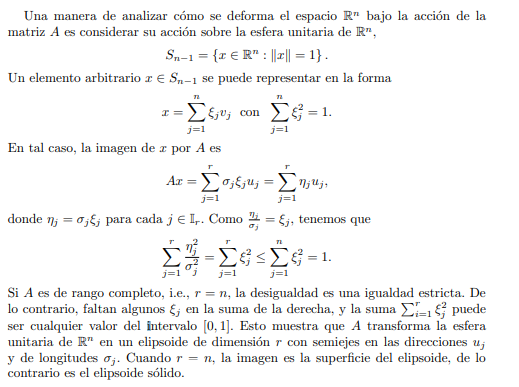

## **Ejercicios**

###**Generales**

#### Dar una matriz de rotación $A\in\mathbb R^{2\times 2}$ que cumpla $A\begin{bmatrix}4\\3\end{bmatrix} = \begin{bmatrix}5\\0\end{bmatrix}.$

In [ ]:
#Veo que A transforme BON en BON
#A[4 3] = [5 0]
#Busco ortogonal a [4 3] = [-3 4]
#BON = {[4 3]/||[4 3]||  [-3 4]/||[-3 4]||} = {[4/5 3/5]  [-3/5 4/5]}
#Ahora A[4/5 3/5] = [5 0]/5 = [1 0]
#Busco ortogonal a [1 0] y de norma 1: [0 1] o [0 -1] -> es el [0 1] (grafico) 
#A[4/5 3/5] = [1 0], A[-3/5 4/5] = [0 1].

#Busco A
#A[4/5 3/5] = [1 0], A[-3/5 4/5] = [0 1].
#[4/5 3/5] = A^(-1)[1 0], [-3/5 4/5] = A^(-1)[0 1].
#[4/5 3/5] = A^T[1 0], [-3/5 4/5] = A^T[0 1].
# Es decir, la primera fila es [4/5 3/5], la segunda es [-3/5 4/5].

#Hallo angulo de rotación
A = Matrix([[Rational('4/5'), Rational('3/5')],
            [Rational('-3/5'), Rational('4/5')]])
#cos(theta) = 4/5, sen(theta) = -3/5 -> el coseno es positivo, el sen es negativo, entonces el angulo está en el 4to cuadrante 
#arrcos(4/5) = 36,86° -> Ajusto valor: 360° -  36,86° = 323,14°.

#### Caracterizar geométricamente $A = \frac12\begin{bmatrix}1&\sqrt{2}&-1\\-\sqrt{2}&0&-\sqrt{2}\\-1&\sqrt{2}&1\end{bmatrix}$.

In [ ]:
A = Rational('1/2')* Matrix([[1, sqrt(2), -1],
                             [-sqrt(2), 0, -sqrt(2)],
                             [-1, sqrt(2), 1]])
determinante = A.det() #el determinante es 1, entonces 1 es autovalor, veo su mult geométrica
A.eigenvals() #su multiplicidad geométrica es 1 => entonces es una rotación
caracterizacion_geometrica(A) #checkeo, de paso veo q funque la función jaja
v1 = hallar_eje_de_rotacion(A)
ang = angulo_rotacion(A)

#### Sea la matriz $A = \begin{bmatrix}2&2&1\\2&1&2\\1&2&2\end{bmatrix}$. Diagonalizar ortogonalmente tal que $A = U\Lambda U^T$.

In [ ]:
A = Matrix([[2,2,1],
            [2,1,2],
            [1,2,2]])
diagonalizacion_ortogonal(A)

⎛⎡√3  -√2    √6 ⎤            ⎞
⎜⎢──  ────   ── ⎥            ⎟
⎜⎢3    2     6  ⎥            ⎟
⎜⎢              ⎥  ⎡5  0  0 ⎤⎟
⎜⎢√3        -√6 ⎥  ⎢        ⎥⎟
⎜⎢──   0    ────⎥, ⎢0  1  0 ⎥⎟
⎜⎢3          3  ⎥  ⎢        ⎥⎟
⎜⎢              ⎥  ⎣0  0  -1⎦⎟
⎜⎢√3   √2    √6 ⎥            ⎟
⎜⎢──   ──    ── ⎥            ⎟
⎝⎣3    2     6  ⎦            ⎠

#### Hallar una matriz simétrica $A$ tal que...

##### Hallar una matriz simétrica $A\in\mathbb R^{3 \times 3}$ tal que $\sigma(A) = \{2,3\}$ y $nul(A-3I) = gen\{\begin{bmatrix}2&1&1\end{bmatrix}^T\}$ 

In [ ]:
#Subespacio del autovalor 3:
v1 = Matrix([2, 1, 1])
#Subespacio del autovalor 2: perpendicular a v1: v1.v2 = 0, v1.v3 = 0
sol, sp, gen = gauss_jordan_con_generadores(v1.T, (zeros(1)))
v2, v3 = gen
#Formo BON
U = GramSchmidt([v1,v2,v3], orthonormal=True)
U = Matrix.hstack(*U)
Lambda = diag(3, 2, 2)
A = U*Lambda*U.T

##### Hallar una matriz simétrica $A\in\mathbb R^{3 \times 3}$ tal que $\sigma(A) = \{1,\frac14\}$ y $nul(A-I) = gen\{\begin{bmatrix}1&1&1\end{bmatrix}^T\}$.

In [ ]:
#Subespacio del autovalor 1:
v1 = Matrix([1,1,1])
#Lo normalizo
v1 = v1/v1.norm()
#Descomposicion Espectral
#A = 1.v1.v1^T + 1/4 . [v2 v3] . [v2 v3]^T
#A = 1.P1 + 1/4.P2    con  P1 + P2 = I
P1 = v1*v1.T
P2 = eye(3) - P1
A = P1 + P2/4

##### Sea $A$ la matriz simétrica tal que $det(A) = 12$, $traza(A)=-1$ y $\{x\in\mathbb R^3: 2x_1 + 2x_2 +x_3 = 0\}$ es un autoespacio de $A$. Hallar $x$ tal que $Ax = \begin{bmatrix}1&1&1\end{bmatrix}^T.$

In [ ]:
#Encuentro los autovalores con el sistema de ecuaciones: lambda1 (doble) = -2.
#Subespacio del autovalor -2:
v1 = Matrix([2, 2, 1])
sol, sp, gen = gauss_jordan_con_generadores(v1.T, (zeros(1)))
v1, v2 = gen[0], gen[1]
#Vector del subespacio del autovalor 3
v3 = producto_vectorial(v1,v2)
U = GramSchmidt([v1,v2,v3], orthonormal=True)
#Construyo
U = Matrix.hstack(*U)
Lambda = diag(-2, -2, 3)
A = U*Lambda*U.T
#Resuelvo
sol, sp, _ = gauss_jordan_con_generadores(A, Matrix([1,1,1]))

#### Dada $A = \begin{bmatrix}1&-2&2\\-1&2&-2\end{bmatrix}$.

$\quad $**a.** Hallar una descomposición en valores singulares de $A$.

$\quad $**b.** Hallar bases de los cuatro subespacios fundamentales.

$\quad $**c.** Hallar una DVS reducida de $A$.

$\quad $**d.** Hallar las matrices de proyección correspondientes a los subespacios fundamentales.

$\quad $**e.** Hallar la pseudoinversa de Moore-Penrose.

$\quad $**f.** Hallar la solución de $Ax = b$ por cuadrados mínimos de norma mínima, con $b = \begin{bmatrix}2&3\end{bmatrix}^T$.


In [ ]:
#a.
#DVS de A: A = U ε V^T, U: 2x2,  ε: 2x3, V^T: 3x3
#Busco A A^T más sencillo: U: 3x3,  ε: 3x2, V^T: 2x2
A=Matrix([[1,-2,2],
          [-1,2,-2]])
AAT = A*A.T #ATA: 2X2
info = AAT.eigenvects()
v2, v1 = info[0][2][0], info[1][2][0]
v1, v2 = GramSchmidt([v1, v2], 'true')
V = Matrix.hstack(v1, v2)
E = Matrix([[sqrt(18), 0], #raiz del autovalor
            [0, 0],
            [0, 0]])
u1 = A.T*v1/sqrt(18)#unico que puedo conseguir así, el resto lo elijo a ojo
u2 = Matrix([0,1,1])
u3 = producto_vectorial(u1, u2)
u1, u2, u3 = GramSchmidt([u1, u2, u3], 'true')
U = Matrix.hstack(u1, u2, u3)
At = U*E*V.T
A = V*E.T*U.T

#Si lo hubiera hecho normal:
#A = U ε V^T, U: 2x2,  ε: 2x3, V^T: 3x3
ATA = A.T*A #ATA: 3X3
info = ATA.eigenvects()
v1, v2, v3 = info[1][2][0], info[0][2][0], info[0][2][1] #obtengo los autovectores de mayor a menor autovalor
v1, v2, v3 = GramSchmidt([v1, v2, v3], 'true')
V = Matrix.hstack(v1, v2, v3)
E = Matrix([[sqrt(18), 0, 0], #raiz del autovalor
            [0, 0, 0]])
u1 = A*v1/sqrt(18)#unico que puedo conseguir así, el resto lo elijo a ojo
u2 = Matrix([1,1])
u1, u2 = GramSchmidt([u1, u2], 'true')
U = Matrix.hstack(u1, u2)
A = U*E*V.T

#b.
colA = u1
nulAt = u2
colAt = v1
nulA = Matrix.hstack(v2, v3)

#c.
A = u1*Matrix([sqrt(18)])*v1.T

#d.
PcolA = colA*colA.T
PcolAt = colAt*colAt.T
PnulA = nulA*nulA.T
PnulAt = nulAt*nulAt.T
PcolA, PcolAt, PnulA, PnulAt

#e.
Adaga = v1*Matrix([sqrt(18)]).inv()*u1.T

#f.
b = Matrix([2, 3])
x_hat = Adaga*b

#las soluciones son de la forma:
#x = x_hat + gen(nul(A))

#### Sea $A = \frac{1}{4}\begin{bmatrix}6&2&-2\\2&3&-1\\-2&-1&3\end{bmatrix}.$ Hallar el conjunto $\left\{ x \in \mathbb{R}^3 : \lim_{k \rightarrow \infty} A^k x = 0\right\}$.

In [ ]:
A = Rational('1/4') * Matrix([[6,2,-2],
                              [2,3,-1],
                              [-2,-1,3]])
A.eigenvects() #solo me importa el autovector del 2, el otro hace que la descomposicion espectral tienda a 0
#Entonces cualquier combinación del autovector del autovalor 2, es decir gen([-2 -1 1]), es solución.

⎡⎛        ⎡⎡-1/2⎤  ⎡1/2⎤⎤⎞  ⎛      ⎡⎡-2⎤⎤⎞⎤
⎢⎜        ⎢⎢    ⎥  ⎢   ⎥⎥⎟  ⎜      ⎢⎢  ⎥⎥⎟⎥
⎢⎜1/2, 2, ⎢⎢ 1  ⎥, ⎢ 0 ⎥⎥⎟, ⎜2, 1, ⎢⎢-1⎥⎥⎟⎥
⎢⎜        ⎢⎢    ⎥  ⎢   ⎥⎥⎟  ⎜      ⎢⎢  ⎥⎥⎟⎥
⎣⎝        ⎣⎣ 0  ⎦  ⎣ 1 ⎦⎦⎠  ⎝      ⎣⎣1 ⎦⎦⎠⎦

#### Hallar una DVS reducida de $$A = \begin{bmatrix}1&-1\\1&1\end{bmatrix}\begin{bmatrix}\frac12&0&0\\0&\frac12&0\end{bmatrix}\begin{bmatrix}0&1&1\\1&-1&1\\2&1&-1\end{bmatrix}.$$

In [ ]:
u1, u2 = Matrix([1, 1]), Matrix([-1, 1])
E = Matrix([[Rational('1/2'),0,0],
            [0, Rational('1/2'),0]])
v1T = Matrix([0,1,1])
v2T = Matrix([1,-1,1])
v3T = Matrix([2,1,-1])
#U tiene que ser ortonormal: no lo es, no está normalizada
u1, u2 = GramSchmidt([u1, u2], 'true') #como terminé multiplicando todo por raiz(2)/2, dividido E por eso
U = Matrix.hstack(u1, u2)
E = Matrix([[Rational('1/2')/(sqrt(2)/2),0,0],
            [0, Rational('1/2')/(sqrt(2)/2),0]])

#V tiene que ser ortonormal en filas: no lo es, no está normalizada
v1T, v2T, v3T = GramSchmidt([v1T, v2T, v3T], 'true') #me fijo por cuanto multipliqué cada fila, y multiplico por eso a las columnas de E
E = Matrix([[Rational('1/2')/(sqrt(2)/2)/(sqrt(2)/2),0,0],
            [0, Rational('1/2')/(sqrt(2)/2)/(sqrt(3)/3),0]])
V = Matrix.hstack(v1T, v2T, v3T)
U, E, V.T #no termine! Los autovalores no están ordenados de mayor a menor: intercambio las primeras columnas de U, las primeras filas de E y las primeras filas de V.t
U = Matrix.hstack(U.col(1), U.col(0))
E = Matrix.vstack(E.row(1), E.row(0))
E = Matrix.hstack(E.col(1), E.col(0), E.col(2))
V = Matrix.hstack(V.col(1), V.col(0), V.col(2))
A = U * E * V.T

#Busco DVS reducida: le saco una col a E, y una fila a V
E = Matrix.hstack(E.col(0), E.col(1))
V = Matrix.hstack(V.col(1), V.col(2))
A = U * E * V.T

#### **(Construir DVS)** Hallar una matriz $A$ tal que $\dots$

##### Hallar una matriz $A \in \mathbb R^{m \times n }/ \quad rg(A) = 2, \quad  \sigma(A) = \{0, \frac94, 9\}, \quad A\begin{bmatrix}1\\-2\\2\end{bmatrix} = \begin{bmatrix}0\\0\\0\end{bmatrix}, \quad \begin{bmatrix}2&2&1\end{bmatrix} A = \begin{bmatrix}0&0&0\end{bmatrix}.$

In [ ]:
#Por la multiplicacion de matrices se que A es 3x3
#Se que [1 -2 2] ∈ Nul(A)
v3 = Matrix([1, -2, 2])
# Nul(A)⟂ = Col(A^T) = gen{[1 -2 2]}⟂ -> Busco a ojo perp a [1 -2 2]
v1 = Matrix([2, 1, 0])
v2 = producto_vectorial(v1, v3)
v1, v2, v3 = GramSchmidt([v1, v2, v3], 'true')
V = Matrix.hstack(v1, v2, v3)

#DVS: A = U E V^T, U: 3x3, E: 3x3, V: 3X3
#Me dan E: diag(raiz(9), raiz(9/4), raiz(0)) = diag(3, 3/2, 0)
#veo que el rango de A es 2, entonces nul(A) = 1 => Nul(A) = gen{[1 -2 2]}
#Transpongo la segunda ecuación: At . [2 2 1]^T = [0 0 0]^T => Nul(At) = gen{[2 2 1]}
# Nul(At) = Col(A)⟂ = gen{[2 2 1]} -> Busco a ojo perp a [2 2 1]

#NUL(AT)
u3 = Matrix([2, 2, 1])
#COL(A)
u1 = Matrix([0, 1, -2])
u2 = producto_vectorial(u1, u3) 
u1, u2, u3 = GramSchmidt([u1, u2, u3], 'true')
U = Matrix.hstack(u1, u2, u3)

E = diag(3, Rational(3/2), 0)
A = U*E*V.T

#Podria haber usado la reducida!
U = Matrix.hstack(U.col(0), U.col(1))
E = diag(3, Rational(3/2))
V = Matrix.hstack(V.col(0), V.col(1))
A = U*E*V.T

##### Hallar una matriz $A \in \mathbb R^{3 \times 2} / \max_{\|x\| = 1} \|Ax\| = 8, \min_{\|x\| = 1} \|Ax\| = 5$ y $\begin{bmatrix}3&6&2\end{bmatrix}A = \begin{bmatrix}0&0&0\end{bmatrix}$. Luego, caracterizar geométricamente la imagen por $T$ de la circunferencia unitaria $\mathbb S_1 = \left\{\begin{bmatrix}x\\y\end{bmatrix} \in \mathbb R^{2} / \left\|\begin{bmatrix}x\\y\end{bmatrix}\right\| = 1\right\}$  

In [ ]:
#Me dan los valores singulares:
#Mayor: 8
#Menor: 5
#A puede tener máximo rango = 2, y como me dan dos valores singulares: A tiene rango = 2
#No hay más valores singulares.
E = Matrix([[8, 0],
            [0, 5],
            [0, 0]])
#A = U.E.V^T, U: 3x3, E: 3x2, V: 2x2

#Col(A) = gen{u1, u2} => Nul(A) = gen{[0 0]}
#Nul(A) = gen{[0 0]} => Nul(A)⟂ = Col(At) = R2 = gen{[1 0], [0 1]}

V = Matrix([[1, 0],
            [0, 1]]) #Col(At)

#Transpongo la ultima ecuación: A^T [3 6 2]^T = [0 0 0]^T => Nul(At) = gen{[3 6 2]}
#Nul(At) = Col(A)⟂ = gen{[3 6 2]} => Col(A) = gen{[3 6 2]}⟂
u3 = Matrix([3, 6, 2])
u1 = Matrix([-2, 1, 0])
u2 = producto_vectorial(u1, u3)
u1, u2, u3 = GramSchmidt([u1, u2, u3], 'true')
U = Matrix.hstack(u1, u2, u3)
A = U*E*V.T

#podría haber usado la reducida!
U = Matrix.hstack(u1, u2)
E = Matrix([[8, 0],
            [0, 5]])
A = U*E*V.T

#Caracterizo

#Con las columnas de V escribo:
#[x y] = a.[1 0] + b.[0 1]
#A[x y] = a.A[1 0] + b.A[0 1]
#A[x y] = a.8.u1 + b.5.u2
#A[x y] = α.u1 + β.u2 => α = a.8, β = b.5

#A[x y] = α.u1 + β.u2 con (α/8)^2 + (β/5)^2 = 1  -> ELIPSE! Semieje mayor sobre gen{u1} de long 8, semieje menor sobre gen{u2} de long 5



##### Hallar una matriz $A \in \mathbb R^{2 \times 3}$ que satisfaga las siguientes propiedades:
$a_{11} > 0$, $\quad \begin{bmatrix}0&1&0\end{bmatrix} \in nul(A)$, $\quad v= \begin{bmatrix}3&0&4\end{bmatrix}^T$ es un autovector de $A^TA$ tal que $Av = \begin{bmatrix}\frac12&\frac12\end{bmatrix}^T$, y $\max_{\|x\|=1} \|Ax\| = 3\sqrt{2}.$
Luego hallar $A\begin{bmatrix}1&1&1\end{bmatrix}^T$.

In [ ]:
#A = U.E.V^T, U: 2x2, E: 2x3, V: 3x3
#El mayor valor singular es 3√2
#El [0 1 0] pertenece a Nul(A) = Nul(A^T.A) -> como dim(col(A)) = 2, entonces dim(nul(A)) = 1
v3 = Matrix([0,1,0])
#Como Nul(A) perp Fil(A), entonces FilA = gen{[0 1 0]}perp
#Como [3 0 4] es autovector, y es perp a [0 1 0], es v1 o v2
v = Matrix([3,0,4]) #para normalizar divido por 5
#A.v/5 = [1/2 1/2]/5 = [1/10 1/10]
#A.vi = oi.ui  -> ||A.vi|| = ||oi.ui|| -> ||[1/10 1/10]|| = ||oi|| -> raiz(2)/10 = oi
#Entonces, como está relacionado a un autovalor q no es el maximo:
v2 = Matrix([Rational('3/5'),0,Rational('4/5')]) #con o2 = raiz(2)/10
u2 = Matrix([sqrt(2)/2, sqrt(2)/2])

Lambda = Matrix([[3*sqrt(2), 0,0],
                 [0, sqrt(2)/10,0]])
#Busco v1 perp a v2 y a v3
v1_version1 = producto_vectorial(v2, v3) 
v1_version2 = producto_vectorial(v3, v2)

#Busco u1 perp a u2
u1_version1 = Matrix([-sqrt(2)/2, sqrt(2)/2])
u1_version2 = Matrix([sqrt(2)/2, -sqrt(2)/2])

A_v11_u11 = Matrix.hstack(u1_version1, u2)*Lambda*Matrix.hstack(v1_version1,v2,v3).T
A_v11_u12 = Matrix.hstack(u1_version2, u2)*Lambda*Matrix.hstack(v1_version1,v2,v3).T
A_v12_u11 = Matrix.hstack(u1_version1, u2)*Lambda*Matrix.hstack(v1_version2,v2,v3).T
A_v12_u12 = Matrix.hstack(u1_version2, u2)*Lambda*Matrix.hstack(v1_version2,v2,v3).T

A_v11_u11, A_v11_u12, A_v12_u11,A_v12_u12
#basicamente tengo dos casos, como me pide que a11 sea mayor a 0, entonces es el caso A_v11_u11 = A_v12_u12

A_v11_u11*Matrix([1,1,1])

⎡ 37 ⎤
⎢ ── ⎥
⎢ 50 ⎥
⎢    ⎥
⎢-23 ⎥
⎢────⎥
⎣ 50 ⎦

##### Sea $A \in \mathbb R^{3 \times 2}$ tal que:
$2\in \sigma(A^TA)$, $\quad nul(A)=\begin{bmatrix}1&3\end{bmatrix}^T$ y $\quad A = \begin{bmatrix}2&0&1\\0&5&0\\-2&0&1\end{bmatrix}\begin{bmatrix}a&0\\0&b\\0&0\end{bmatrix}P$, donde $a>b\geq 0$ y $P \in \mathbb R^{2\times 2}$ es una amtriz ortogonal tal que $0>P_{11}$.
Hallar la solución por mínimos cuadrados de norma mínima de la ecuación $Ax=\begin{bmatrix}3&2&1\end{bmatrix}^T$.

In [93]:
#A = U.E.V^T, U: 3x3, E: 3x2, V: 2x2

#2 es un autovalor, entonces raiz(2) es un valor singular
#0 es otro autovalor, su dim es 1, su autovector es [1 3]-> v2 sin normalizar
#Entonces v1 es un vector perpendicular a v1 tal que P11 es menor a 0: v1 = [-3 1] sin normalizar
v1 = Matrix([-3,1]).normalized()
v2 = Matrix([1,3]).normalized()
V = Matrix.hstack(v1, v2)
Lambda = Matrix([[sqrt(2), 0],
                 [0, 0],
                 [0, 0]])
#Normalizo U
u1 = Matrix([2,0,-2]).normalized()
u2 = Matrix([0,5,0]).normalized()
u3 = Matrix([1,0,1]).normalized()
U = Matrix.hstack(u1, u2, u3)

#A = U.E.V^T, U: 3x1, E: 1x1, Vt: 1x2

#Busco Adaga: hago DVSr
Ur = Matrix.hstack(U.col(0))
Lambda = diag(sqrt(2))
Vr = Matrix.hstack(V.col(0))
Adaga = Vr*Lambda.inv()*Ur.T
b = Matrix([3,2,1])
x = Adaga*b

###**Stop**

#### 5.**2.** Comprobar que las siguientes matrices $U\in\mathbb R^{3 \times 3}$ son ortogonales $$\frac17\begin{bmatrix}2&-6&3\\-6&-3&-2\\3&-2&-6\end{bmatrix}, \quad \frac17\begin{bmatrix}-2&6&3\\6&3&-2\\-3&2&-6\end{bmatrix}, \quad \frac17\begin{bmatrix}2&3&-6\\-6&-2&-3\\3&-6&-2\end{bmatrix}.$$
En cada caso caracterizar la isometría $T: \mathbb R^3 ⇒ \mathbb R^3$ definida por $T(x) = Ux.$

In [ ]:
A = Rational('1/7') * Matrix([[ 2, -6,  3],
                              [-6, -3, -2],
                              [ 3, -2, -6]])
A.det() #1
A.eigenvals() #1 es autovalor simple, -1 es autovalor doble -> Rotacion
v1 = hallar_eje_de_rotacion(A)[0]
#angulo_rotacion(A)#hacer a mano porque no lo programé y paja

A = Rational('1/7') * Matrix([[-2,  6,  3],
                              [ 6,  3, -2],
                              [-3,  2, -6]])
A.det() #1
A.eigenvals() #1 es autovalor simple, dos autovalores imaginarios -> Rotacion
v1 = hallar_eje_de_rotacion(A)[0]
v1 = v1/v1.norm()
caracterizacion_geometrica(A)
angulo_rotacion(A)
  
A = Rational('1/7') * Matrix([[ 2,  3, -6],
                              [-6, -2, -3],
                              [ 3, -6, -2]])
A.det() #-1
A.eigenvals() #-1 es autovalor simple, dos autovalores imaginarios -> Es una rotación seguida de una simetría
caracterizacion_geometrica(A)
v1 = hallar_eje_de_rotacion(A)[0]
v1 = v1/v1.norm()
v2 = v1.T.nullspace()[0]
v2  = v2/v2.norm()
angulo_rotacion(A)
v3 = producto_vectorial(v1, v2)
#Simetria respecto plano gen{v2, v3}

#### 5.**7.**  Hallar una matriz simétrica $A\in\mathbb R^{3 \times 3}$ tal que:

##### $\quad$ **a.** $\sigma(A) = \{1,\frac14\}$ y $nul(A-I) = gen\{\begin{bmatrix}1&1&1\end{bmatrix}^T\}$.

In [ ]:
#Subespacio del autovalor 1:
v1 = Matrix([1,1,1])
#Lo normalizo
v1 = v1/v1.norm()
#Descomposicion Espectral
#A = 1.v1.v1^T + 1/4 . [v2 v3] . [v2 v3]^T
#A = 1.P1 + 1/4.P2    con  P1 + P2 = I
P1 = v1*v1.T
P2 = eye(3) - P1
A = P1 + P2/4

##### $\quad$ **b.** $\begin{bmatrix}1&0&1\end{bmatrix}^T \in nul(A-I), \begin{bmatrix}1&1&-1\end{bmatrix}^T \in nul(A-2I)$ y $det(A) = 12$.

In [ ]:
#Se q 1 y 2 son autovalores. Por el enunciado: l1.l2.l3 = 12 => l3 = 6
#Busco autovector asociado a 6: tiene que ser perpendicular a v1 y v2
v1 = Matrix([1,0,1])
u1 = v1/v1.norm()
v2 = Matrix([1,1,-1])
u2 = v2/v2.norm()
u3 = producto_vectorial(u1,u2)
U = Matrix.hstack(u3, u2, u1)
L = diag(6, 2, 1)
A = U*L*U.inv()
#Checkeo:
#det(A) #12
#(A- eye(3)).nullspace()
#(A- 2*eye(3)).nullspace()
#diagonalizacion_ortogonal(A) #checkeo

##### $\quad$ **c.** $\begin{bmatrix}1&0&0\end{bmatrix}^T$ y $\begin{bmatrix}2&3&4\end{bmatrix}^T$ son autovectores de $A$, $det(A) = 18$, $tr(A) = 8$, y $\sigma(A) \subset (0, +\infty)$.

In [ ]:
v1 = Matrix([1,0,0])
v2 = Matrix([2,3,4])
v1.T*v2 #No son ortogonales, entonces pertenecen al mismo subespacio, es decir, corresponden al mismo autovalor.
#det(A) = 18    y   tr(A) = 8   -> resuelvo: me da dos posibles valores de lambda tal que cumple con la consigna, elijo uno (puedo elegir el otro si quiero)
#lambda1 = 3 (doble), lambda2 = 2
#lambda1 tiene autovectores v1, v2
v1, v2 = GramSchmidt([v1,v2], 'true') #los ortonormalizo
#lambda2 tiene autovector v3
v3 = producto_vectorial(v1, v2)
U = Matrix.hstack(v1, v2, v3)
L = diag(3, 3, 2)
A = U*L*U.inv()
#Checkeo:
#A.eigenvects()
#dos_subespacios_generan_el_mismo_subespacio(A.eigenvects()[1][2], [v1,v2])
#det(A)
#trace(A)
#diagonalizacion_ortogonal(A)

##### $\quad$ **d.** $A^3-5A^2$ es singular, rango$(A-3I) = 1$, el plano $\{x\in\mathbb R^3:2x_1-x_2+2x_3=0\}$ es un autoespacio de $A$ y $\sigma(A) \subset (0, +\infty)$.

In [ ]:
#Busco autovectores del primer autovalor (y unico?)
S1 = Matrix([[2,-1,2]])
sol, sp, gen = gauss_jordan_con_generadores(S1, zeros(1))
v1, v2 = gen
#Como tiene dim = 2, y por enunciado se que el autovalor 2 tiene mu = 2, entonces corresponde al autovalor = 3.

#Analizo el otro autovalor (o será 3 con mu = 3?)
#p = x^3-5x^2, p(lambda)=0, lambda = 5 ó lambda = 0 -> no puede ser 0 (por restricción de enunciado)
#o(A)= {5, 3(doble)}.

#Ortogonalizo autovectores de S1
u1, u2 = GramSchmidt([v1, v2], 'true')

#Hallo autovector correspondiente a autovalor = 5
u3 = producto_vectorial(u1, u2)

#Armo:
U = Matrix.hstack(u3, u2, u1)
L = diag(5, 3, 3)
A = U*L*U.inv()

#Checkeo:
#diagonalizacion_ortogonal(A)
#(A-3*eye(3)).columnspace() #rango = 1
#A.eigenvects()

#### 5.**8.** Para cada una de las matrices $$A = \frac{1}{18}\begin{bmatrix}13&-2&-4\\-2&10&2\\-4&2&13\end{bmatrix}, A = \frac{1}{18}\begin{bmatrix}17&2&-2\\2&14&4\\-2&4&14\end{bmatrix}.$$

**( a )** Hallar $\left\{ x \in \mathbb{R}^3 : \lim_{k \rightarrow \infty} A^k x = \begin{bmatrix} 0 & 0 & 0\end{bmatrix}^T \right\}$

**( b )** Comprobar que $\begin{bmatrix} -2 & 1 & 2\end{bmatrix}^T \in \left\{\lim_{k \rightarrow \infty} A^k x : x \in \mathbb{R}^3 \right\}$ y hallar todas las soluciones de la ecuación $\lim_{k \rightarrow \infty} A^k x = \begin{bmatrix} -2 & 1 & 2\end{bmatrix}^T$

In [ ]:
A = Rational('1/18')*Matrix([[13, -2, -4],
                             [-2, 10, 2],
                             [-4, 2, 13]])

#Subespacio del autovalor 1:
v1 = A.eigenvects()[1][2][0]
#Lo normalizo
u1 = v1/v1.norm()
#Descomposicion Espectral
#A = 1.v1.v1^T + 1/2 . [v2 v3] . [v2 v3]^T
#A = 1.P1 + 1/2.P2    con  P1 + P2 = I
P1 = u1*u1.T
P2 = eye(3) - P1

A = P1 + P2/2

#A^k = P1 + P2/2^k
#A^k x = P1 . x  + P2/2^k . x
#lim = P1 . x
#Me piden el nul(P1) = col(P2) = gen{v2, v3}

B = Rational('1/18')*Matrix([[17, 2, -2],
                             [ 2, 14, 4],
                             [-2, 4, 14]])

#Subespacio del autovalor 1:
v1 = B.eigenvects()[0][2][0]
#Lo normalizo
u1 = v1/v1.norm()
#Descomposicion Espectral
#A = 1/2.v1.v1^T + [v2 v3] . [v2 v3]^T
#A = 1/2.P1 + P2    con  P1 + P2 = I
P1 = u1*u1.T
P2 = eye(3) - P1

A = P1/2 + P2
#A^k = P1/2^k + P2/2^
#A^k x = P1/2^k . x  + P2 . x
#lim = P2 . x
#Me piden el nul(P2) = col(P1) = gen{v1}


#la segunda parte es re de la guia 1, no podes no saber hacerlo, y yo tengo paja de hacerlo sorry not sorry

In [ ]:
A = Rational('1/4')*Matrix([[6, 2, -2],
                             [2, 3, -1],
                             [-2, -1, 3]])

P, L = diagonalizacion_ortogonal(A)
S1 = Matrix.hstack(P.col(0), P.col(1))
S2 = P.col(2)
#Descomposicion Espectral
#A = 2*S1*S1.T + 1/2 . [v2 v3] . [v2 v3]^T
# #A = 1.P1 + 1/2.P2    con  P1 + P2 = I
P1 = S1*S1.T
P2 = eye(3) - P1

# A = P1 + P2/2

#A^k = P1 + P2/2^k
#A^k x = P1 . x  + P2/2^k . x
#lim = P1 . x
#Me piden el nul(P1) = col(P2) = gen{v2, v3}

#### 5.**13.** Hallar $A^\dagger$, la pseudoinversa de Moore-Penrose de $A$, y determinar la solución por cuadrados mínimos de norma mínima de la ecuación $Ax =b $

$\quad a. \quad A = \begin{bmatrix}7&1\\0&0\\5&5\end{bmatrix}\quad y \quad b= \begin{bmatrix}b_1\\b_2\\b_3\end{bmatrix}$.

$\quad b. \quad A = \begin{bmatrix}3&2&2\\2&3&-2\end{bmatrix}\quad y \quad b= \begin{bmatrix}b_1\\b_2\end{bmatrix}$.

In [ ]:
#DVS de A: A = U ε V^T, U: 3x3,  ε: 3x2, V^T: 2x2
A = Matrix([[7,1],
            [0,0],
            [5,5]])
ATA = A.T*A #ATA: 2X2
info = ATA.eigenvects()
v1, v2= info[1][2][0], info[0][2][0] #obtengo los autovectores de mayor a menor autovalor
v1, v2 = GramSchmidt([v1, v2], 'true')
V = Matrix.hstack(v1, v2)
E = Matrix([[sqrt(90), 0], #raiz del autovalor
            [0, sqrt(10)],
            [0, 0]])
u1 = A*v1/sqrt(90)#
u2 = A*v2/sqrt(10)#los únicos que puedo conseguir, el último lo elijo a ojo
u3 = producto_vectorial(u1, u2)
u1, u2, u3 = GramSchmidt([u1, u2, u3], 'true')
U = Matrix.hstack(u1, u2, u3)
A = U*E*V.T

colA = Matrix.hstack(u1, u2) 
nulAt = u3
colAt = Matrix.hstack(v1, v2) 
nulA = Matrix([0, 0])

#DVSr
A == colA*Matrix([[sqrt(90), 0],
                  [0, sqrt(10)]])*colAt.T

#Adaga
Adaga = colAt*Matrix([[sqrt(90), 0],
                      [0, sqrt(10)]]).inv()*colA.T

#Solucion norma minima
b1, b2, b3 = symbols('b_1, b_2, b_3')
b = Matrix([b1, b2, b3])
x_hat = Adaga*b

#DVS de A: A = U ε V^T, U: 2x2,  ε: 2x3, V^T: 3x3
A = Matrix([[3,2,2],
            [2,3,-2]])
ATA = A.T*A #ATA: 3X3
info = ATA.eigenvects()
v1, v2, v3= info[2][2][0], info[1][2][0], info[0][2][0] #obtengo los autovectores de mayor a menor autovalor
v1, v2, v3 = GramSchmidt([v1, v2, v3], 'true')
V = Matrix.hstack(v1, v2, v3)
E = Matrix([[sqrt(25), 0, 0], #raiz del autovalor
             [0, sqrt(9), 0]])
u1 = A*v1/sqrt(25)#
u2 = A*v2/sqrt(9)#los únicos que puedo conseguir, el último lo elijo a ojo
u1, u2 = GramSchmidt([u1, u2], 'true')
U = Matrix.hstack(u1, u2)
U*E*V.T

colA = Matrix.hstack(u1, u2) 
nulAt = Matrix([0, 0])
colAt = Matrix.hstack(v1, v2) 
nulA = v3

#DVSr
A == colA*Matrix([[sqrt(25), 0],
                  [0, sqrt(9)]])*colAt.T

#Adaga
Adaga = colAt*Matrix([[sqrt(25), 0],
                     [0, sqrt(9)]]).inv()*colA.T

#Solucion norma minima
b1, b2 = symbols('b_1, b_2')
b = Matrix([b1, b2])
x_hat = Adaga*b

#### 5.**15.** Hallar una matriz $A \in \mathbb R^{m \times n}$ tal que:

$\quad a. \quad$ $\max_{\|x\| = 1} \|Ax\| = 25\sqrt{2}, \min_{\|x\| = 1} \|Ax\| = 15$ y $\begin{bmatrix}1&1&0\end{bmatrix}A = \begin{bmatrix}0&0\end{bmatrix}$. 

$\quad b. \quad$ $\begin{bmatrix}0&1&0\end{bmatrix}\in nul(A)$, $v =\begin{bmatrix}3&0&4\end{bmatrix}^T$ es un autovector de  $A^TA$ tal que $Av = \begin{bmatrix}\frac12 \frac12\end{bmatrix}^T$, y $\max_{\|x\| = 1} \|Ax\| = 3\sqrt{2}$. 


In [ ]:
#a.

#Por la multiplicacion, veo que A es de 3x2
#A = U E V^T, U: 3x3, E: 3x2, V: 2x2
#Me dan los valores singulares:
#Mayor: 25√(2)
#Menor: 15
#A puede tener máximo rango = 2, y como me dan dos valores singulares: A tiene rango = 2
#No hay más valores singulares.
E = Matrix([[25*sqrt(2), 0],
            [0, 15],
            [0, 0]])

#DVSr: A = Ur.Er.Vr^T, U: 3x2, E: 2x2, V: 2x2
Er = Matrix([[25*sqrt(2), 0],
            [0, 15]])

#Transpongo la ultima ecuación: A^T [1 1 0]^T = [0 0]^T => Nul(At) = gen{[1 1 0]}
#Nul(At) = Col(A)⟂ = gen{[1 1 0]} => Col(A) = gen{[1 1 0]}⟂
u1 = Matrix([-1, 1, 0])
u2 = Matrix([0, 0, 1])
u1, u2 = GramSchmidt([u1, u2], 'true')
Ur = Matrix.hstack(u1, u2)

#Como ColA + NulA = 2 => NulA = 0
#ColAT = R2

Vr = Matrix([[1, 0],
            [0, 1]])
A = Ur*Er*Vr.T

In [ ]:
#b.
#Por la multiplicacion se que A es de 2x3
#A = U E V^T, U: 2x2, E: 2x3, V: 3x3

v = Matrix([3,0,4]) #podria ser parte de la DVS pero falta normalizar
vi = v.normalized() #divido por 5
#se que entonces A.vi = oi.ui
#A.v = [1/2 1/2] -> lo divido por 5 como hice con el vector:  A.v/5 = A.vi = [1/2 1/2]/5 = [1/10 1/10]
#Ahora si es valido decir [1/10 1/10] = oi.ui 
#aplico norma: ||[1/10 1/10]|| = ||oi.ui|| -> ||ui|| = 1
#||[1/10 1/10]|| = oi -> √(2)/10 = oi
#Por las dimensiones de E se que hay dos valores singulares, por lo que este es el segundo valor singular,
# teniendo asociados un v2 = [0 3/5 4/5], u2 = [√(2)/2 √(2)/2]
v2 = vi
u2 = Matrix([sqrt(2)/2, sqrt(2)/2])
E = Matrix([[3*sqrt(2), 0, 0],
            [0, sqrt(2)/10, 0]])

#El ultimo dato que me da la consigna es que [0 1 0] está en el nul(A) -> como Col(A) = 2 (lo se por los valores singulares), Nul(A) = 1
v3 = Matrix([0, 1, 0])

#Y u1 y v1 son elegidos arbitrariamente:
u1 = Matrix([sqrt(2)/2, -sqrt(2)/2])
v1 = Matrix([-4,0,3]).normalized()
U = Matrix.hstack(u1, u2)
V = Matrix.hstack(v1, v2, v3)
A = U*E*V.T

#### 5.**17.** En cada uno de los siguientes casos, caracterizar geométricamente y graficar la imagen por $T$ de la circunferencia unitaria $\mathbb S_2 = \{x\in\mathbb R^3: \|x\| = 1\}.$

$\quad a. \quad A = \begin{bmatrix}1&1&1\\1&1&1\end{bmatrix}$.

$\quad b. \quad A = \begin{bmatrix}3&2&2\\2&3&-2\end{bmatrix}$.

In [ ]:
#a. 
#DVS de A: A = U ε V^T, U: 2x2,  ε: 2x3, V^T: 3x3
A = Matrix([[1,1, 1],
            [1,1, 1]])
ATA = A.T*A #ATA: 3X3
info = ATA.eigenvects()
v1, v2, v3= info[1][2][0], info[0][2][0], info[0][2][1] #obtengo los autovectores de mayor a menor autovalor
v1, v2, v3 = GramSchmidt([v1, v2, v3], 'true')
V = Matrix.hstack(v1, v2, v3)
E = Matrix([[sqrt(6), 0, 0], #raiz del autovalor
             [0, 0, 0]])
u1 = A*v1/sqrt(6)
u2 = Matrix([-sqrt(2)/2, sqrt(2)/2])
u1, u2= GramSchmidt([u1, u2], 'true')
U = Matrix.hstack(u1, u2)
A = U*E*V.T

#Combinación lineal de V: [x y z] = a.v1 + b.v2 + c.v3 con a^2 + b^2 + c^2 = 1
#A[x y z] = a.Av1 + b.Av2 + c.Av3
#Los ultimos dos vectores corresponden al nulo
#A[x y z] = a.Av1
#A[x y z] = a.o1.u1
#A[x y z] = a.raiz(6).u1 -> α = a.raiz(6)
#A[x y z] = α.u1       con    a^2 ≤ 1   => (α/raiz(6))^2 ≤ 1  -> segmento

#b.
#DVS de A: A = U ε V^T, U: 2x2,  ε: 2x3, V^T: 3x3
A = Matrix([[3,2, 2],
            [2,3, -2]])
ATA = A.T*A #ATA: 2X2
info = ATA.eigenvects()
v1, v2, v3= info[2][2][0], info[1][2][0], info[0][2][0] #obtengo los autovectores de mayor a menor autovalor
v1, v2, v3 = GramSchmidt([v1, v2, v3], 'true')
V = Matrix.hstack(v1, v2, v3)
E = Matrix([[sqrt(25), 0, 0], #raiz del autovalor
             [0, sqrt(9), 0]])
u1 = A*v1/sqrt(25)
u2 = A*v2/sqrt(9)
U = Matrix.hstack(u1, u2)
A = U*E*V.T
#Combinación lineal de V: [x y z] = a.v1 + b.v2 + c.v3 con a^2 + b^2 + c^2 = 1
#A[x y z] = a.Av1 + b.Av2 + c.Av3
#El ultimo vector corresponde al nulo
#A[x y z] = a.Av1 + b.Av2 
#A[x y z] = a.o1.u1 + b.o2.u2
#A[x y z] = a.raiz(25).u1 + b.raiz(9).u2 -> α = a.raiz(25), β = b.raiz(9) 
#A[x y z] = α.u1 + β.u2       con    a^2 + b^2 ≤ 1   => (α/raiz(25))^2 + (β/raiz(9))^2  ≤ 1  -> elipse solida plana